# Understanding  Decision Tree and Random Forest using  heart disease patient data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

#Suppressing all warnings
#warnings.filterwarnings("ignore")

### Reading and exploring dataset

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

### Checking for null values and imputing null values if exist

In [6]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### EDA

In [7]:

df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

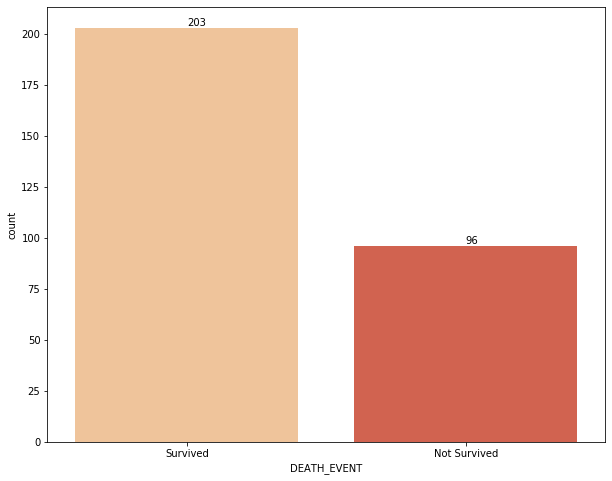

In [8]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['DEATH_EVENT'], palette='OrRd')
ax.set_xticklabels(['Survived','Not Survived'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

#### Here  survived are 203 and  not survived are  96

In [9]:
sources_pie = go.Pie( values=df.DEATH_EVENT.value_counts())


layout = go.Layout(height = 600,
                   width = 800,
                   autosize = False,
                   title = 'Death Event')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [10]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.histogram(df, x="age")
fig.show()

## Most of patients are from 50-70 age group

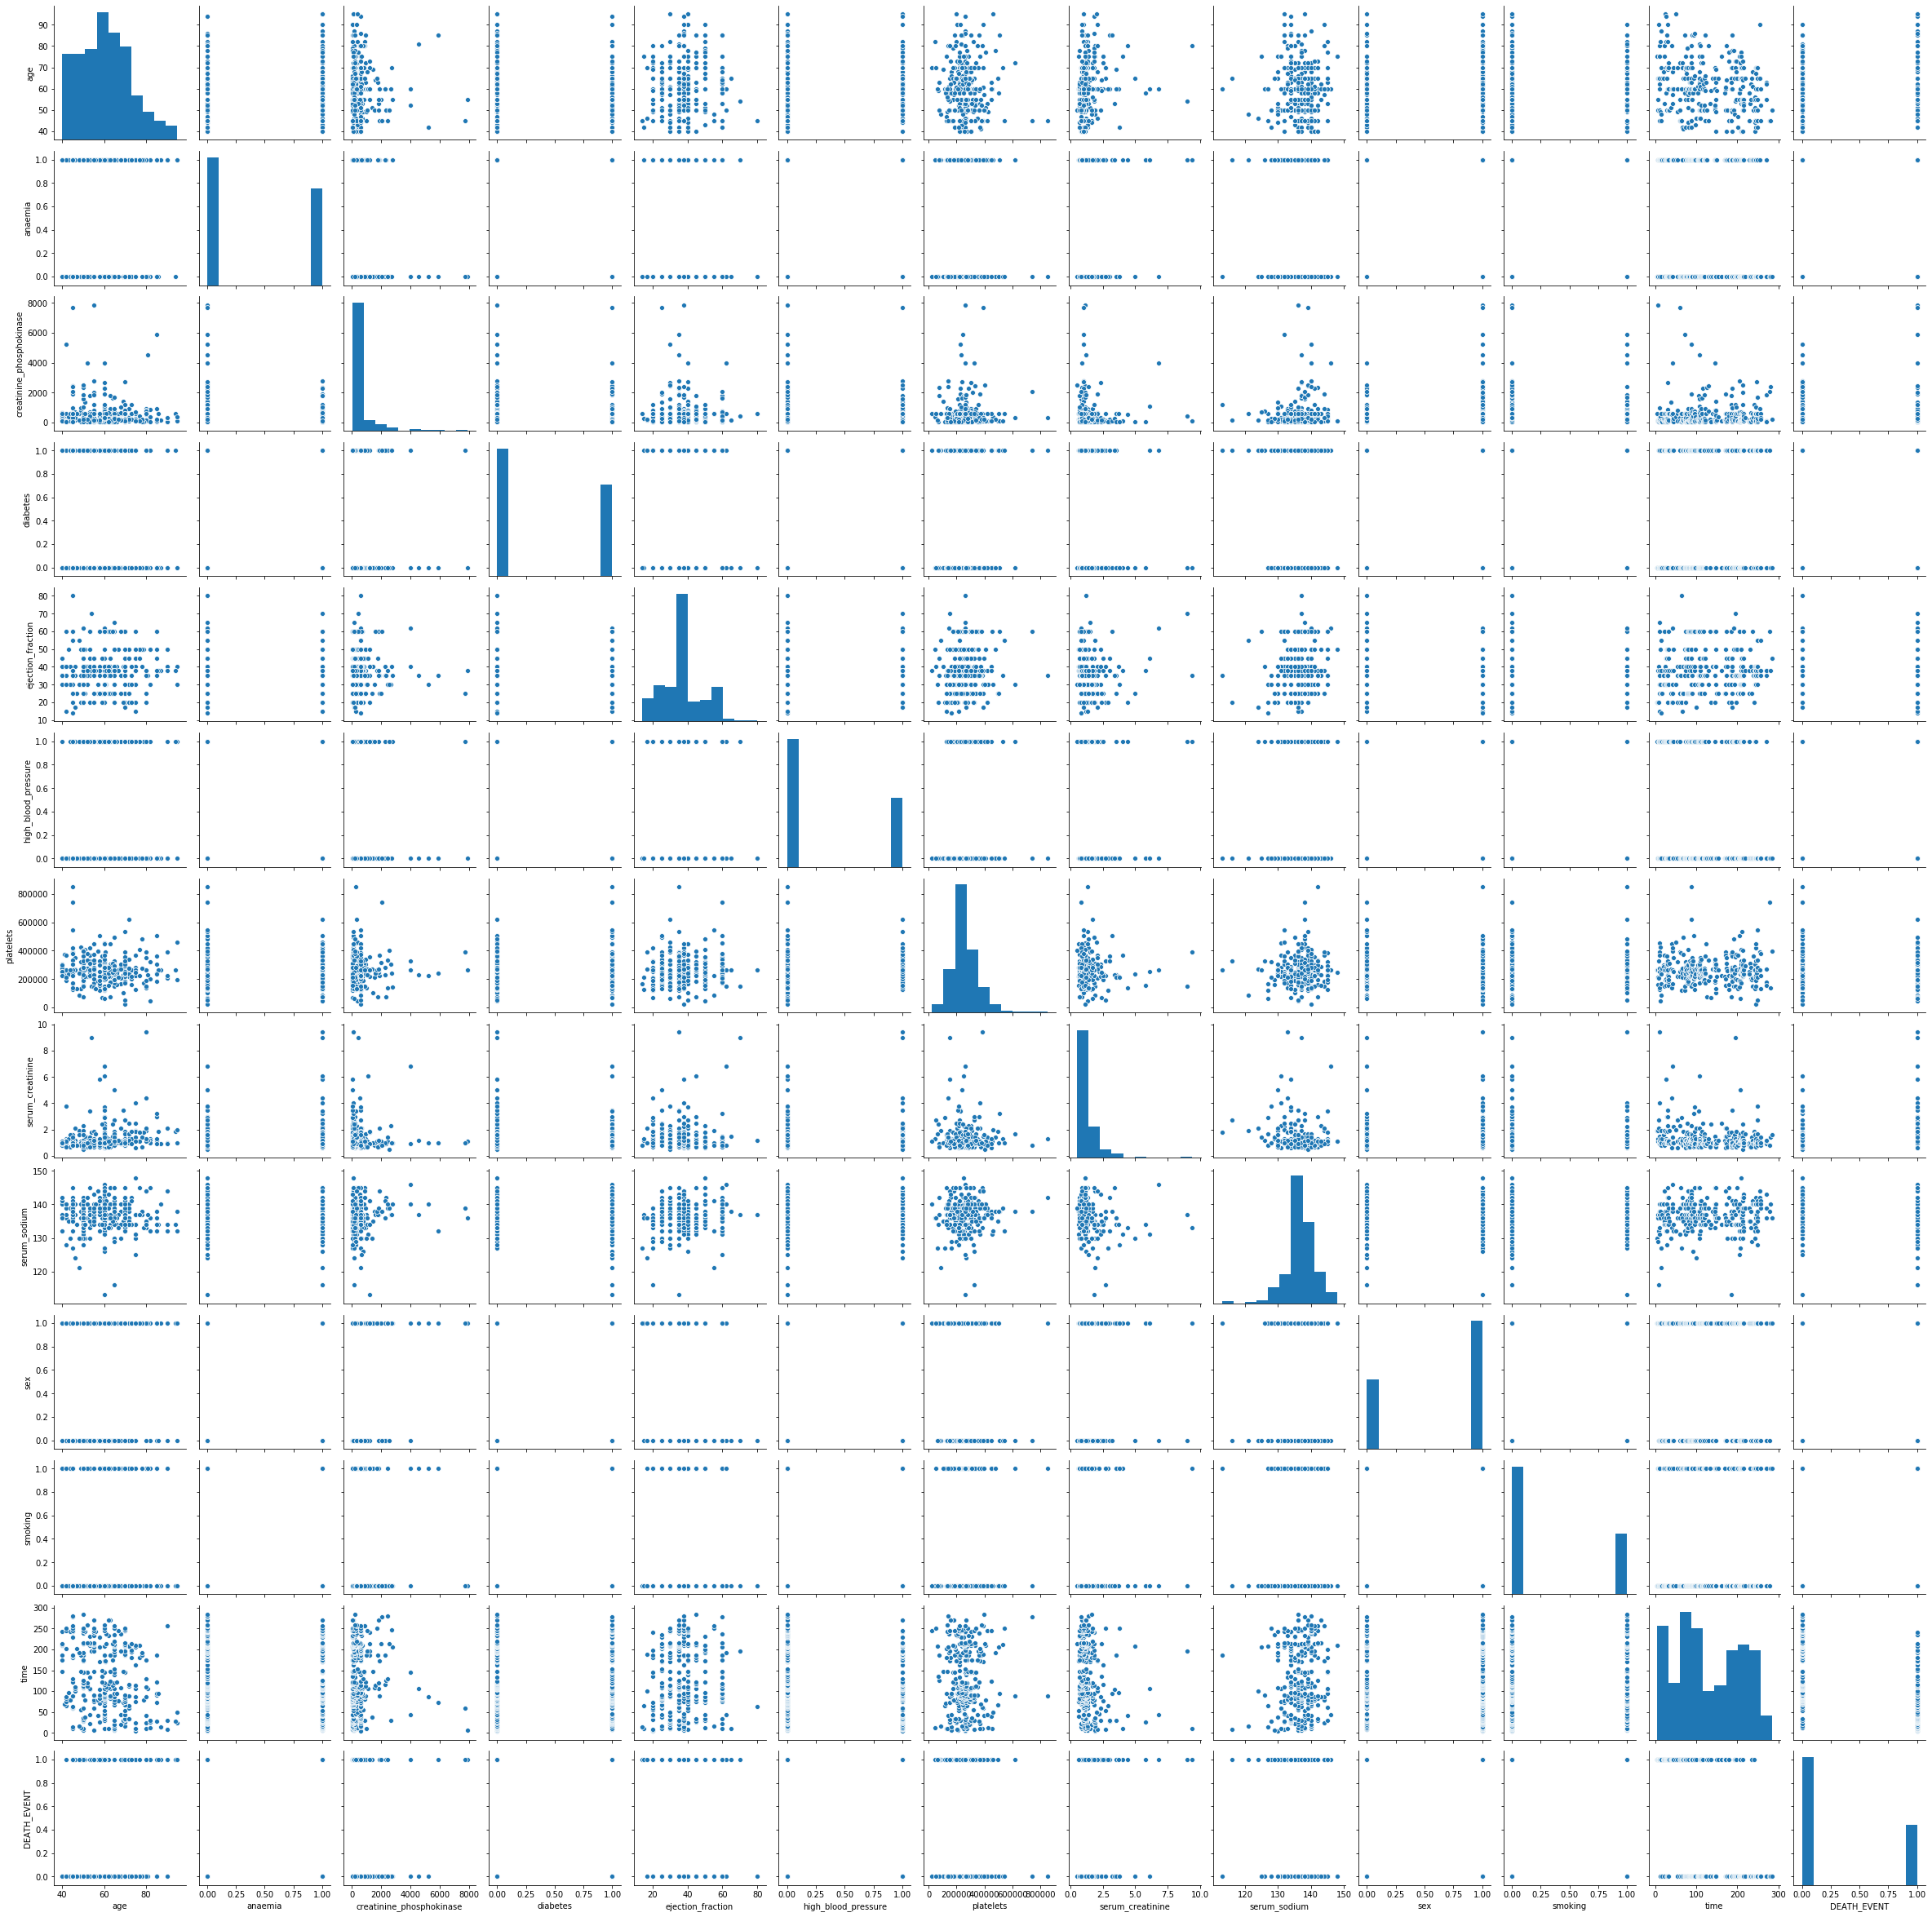

In [11]:


sns.pairplot(df)

In [12]:
c=df.corr()

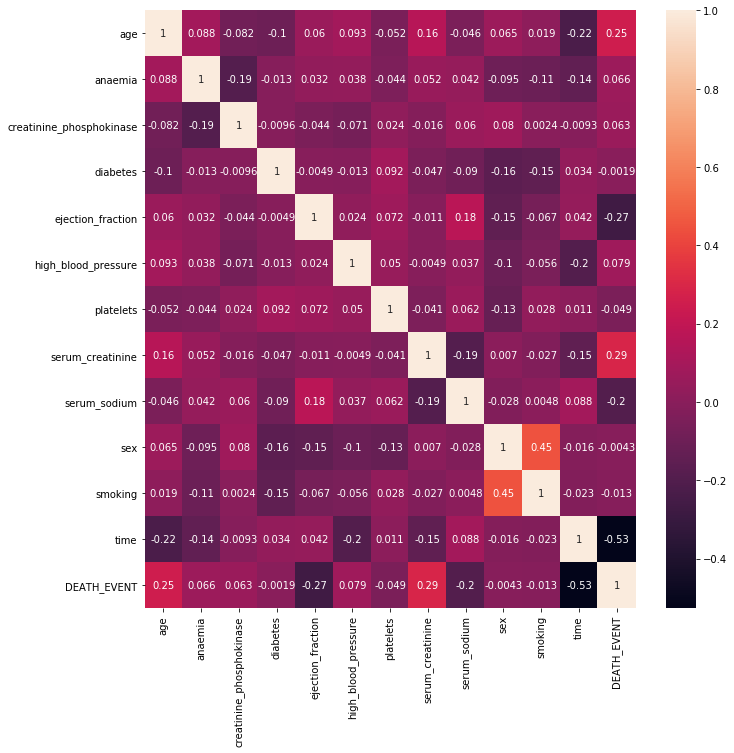

In [13]:
f, ax = plt.subplots(figsize=(11, 11)) 
sns.heatmap(c,annot=True)

In [14]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [16]:
X.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((209, 12), (90, 12))

## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [20]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydotplus, graphviz

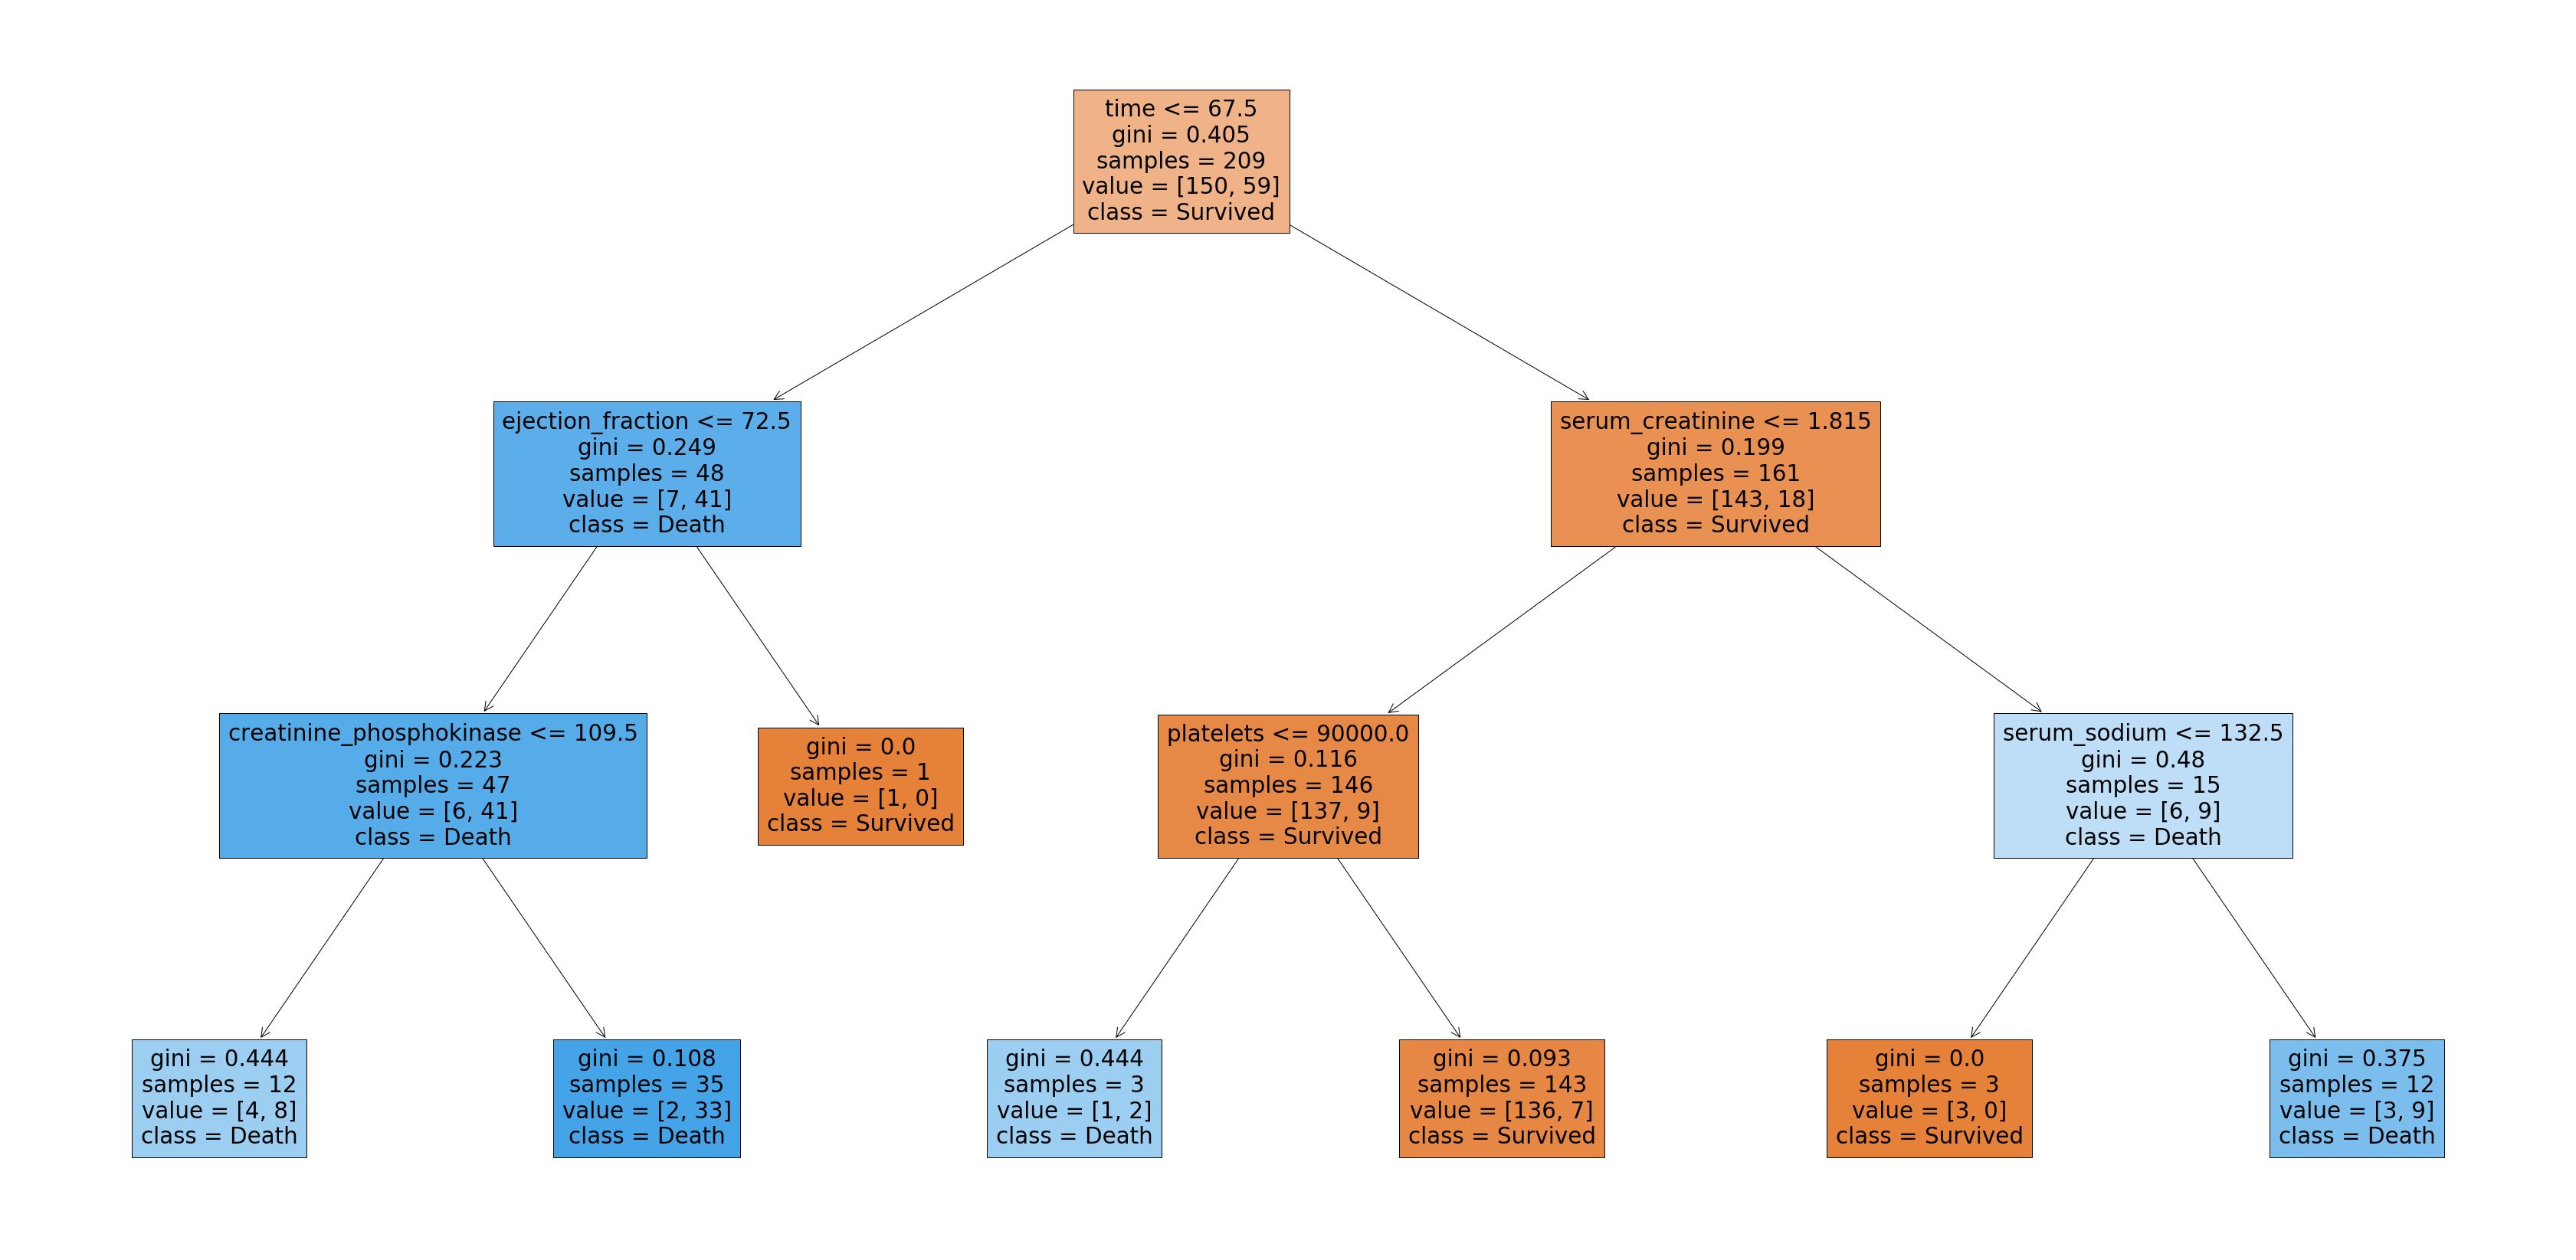

In [22]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

#### Evaluating model performance

In [23]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [24]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.9186602870813397


array([[140,  10],
       [  7,  52]], dtype=int64)

In [25]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.7222222222222222


array([[45,  8],
       [17, 20]], dtype=int64)

In [26]:
#Helper Function

In [27]:
#def get_dt_graph(dt_classifier):
 #   dot_data = StringIO()
#    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                    feature_names=X.columns, 
#                    class_names=['Survived', "Death"])
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#    return graph

In [28]:
def get_dt_graph(dt_classifier):
    plt.figure(figsize=(60,30))
    plot_tree(dt_classifier, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [29]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train ROC_AUC Score :", roc_auc_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Train ROC_AUC Score :", roc_auc_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

### Without setting any hyper-parameters

In [30]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

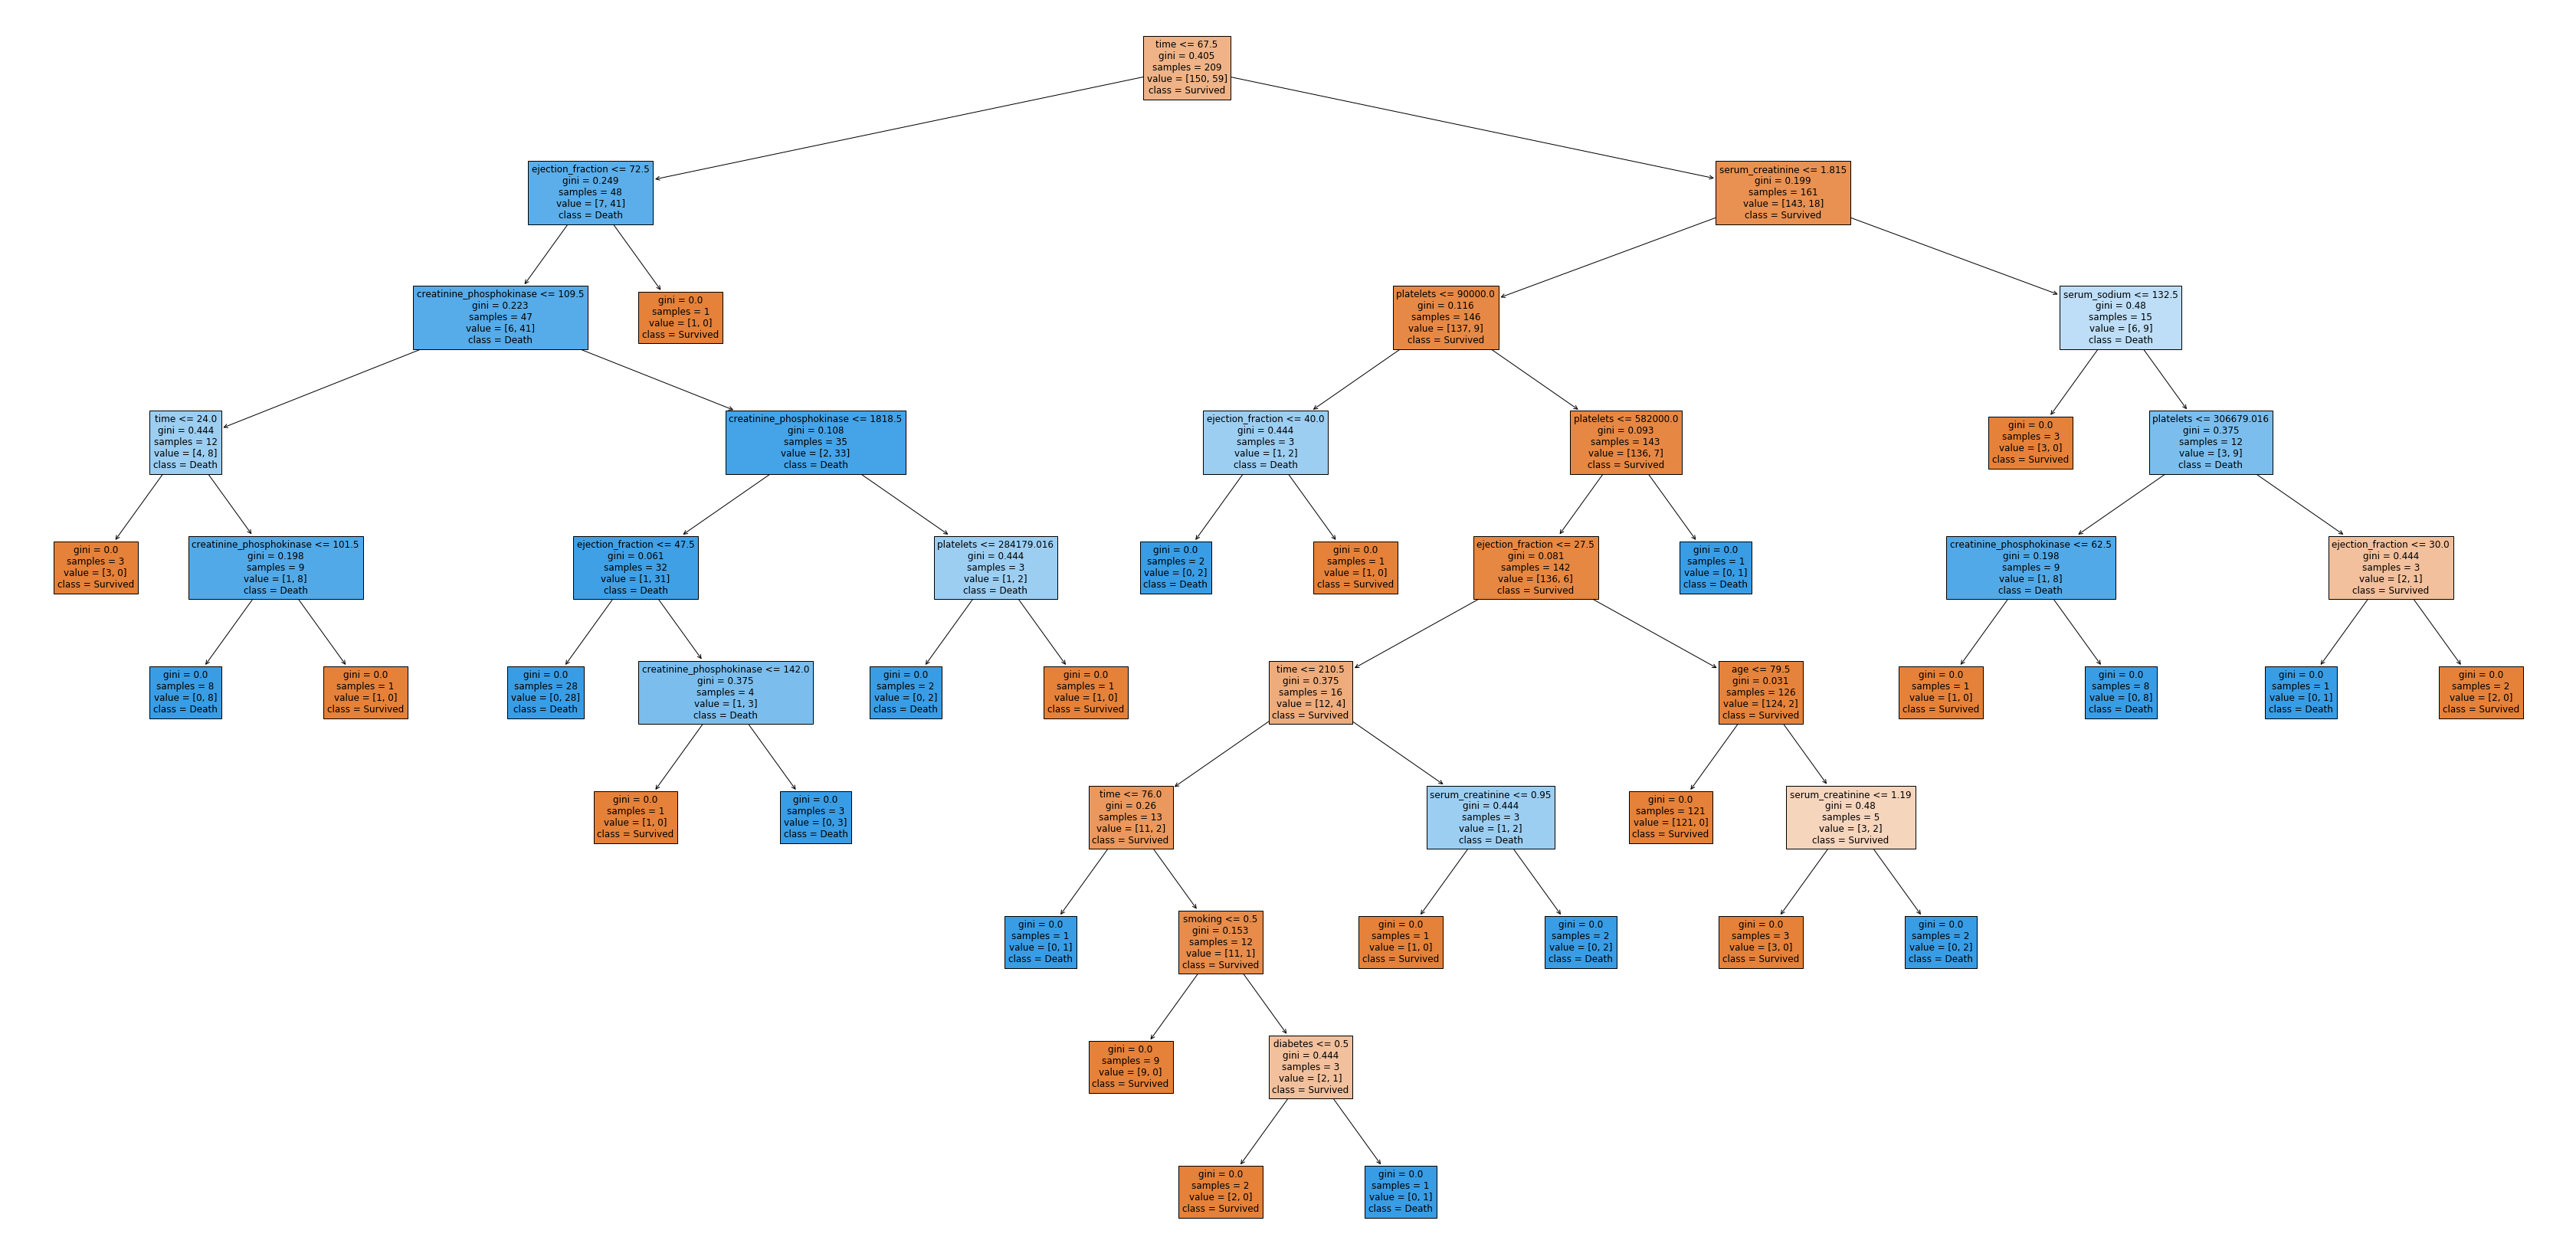

In [31]:
get_dt_graph(dt_default)


In [32]:
evaluate_model(dt_default)

Train Accuracy : 1.0
Train ROC_AUC Score : 1.0
Train Confusion Matrix:
[[150   0]
 [  0  59]]
--------------------------------------------------
Test Accuracy : 0.6777777777777778
Train ROC_AUC Score : 0.6529831718510964
Test Confusion Matrix:
[[42 11]
 [18 19]]


### Controlling the depth of the tree

In [33]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

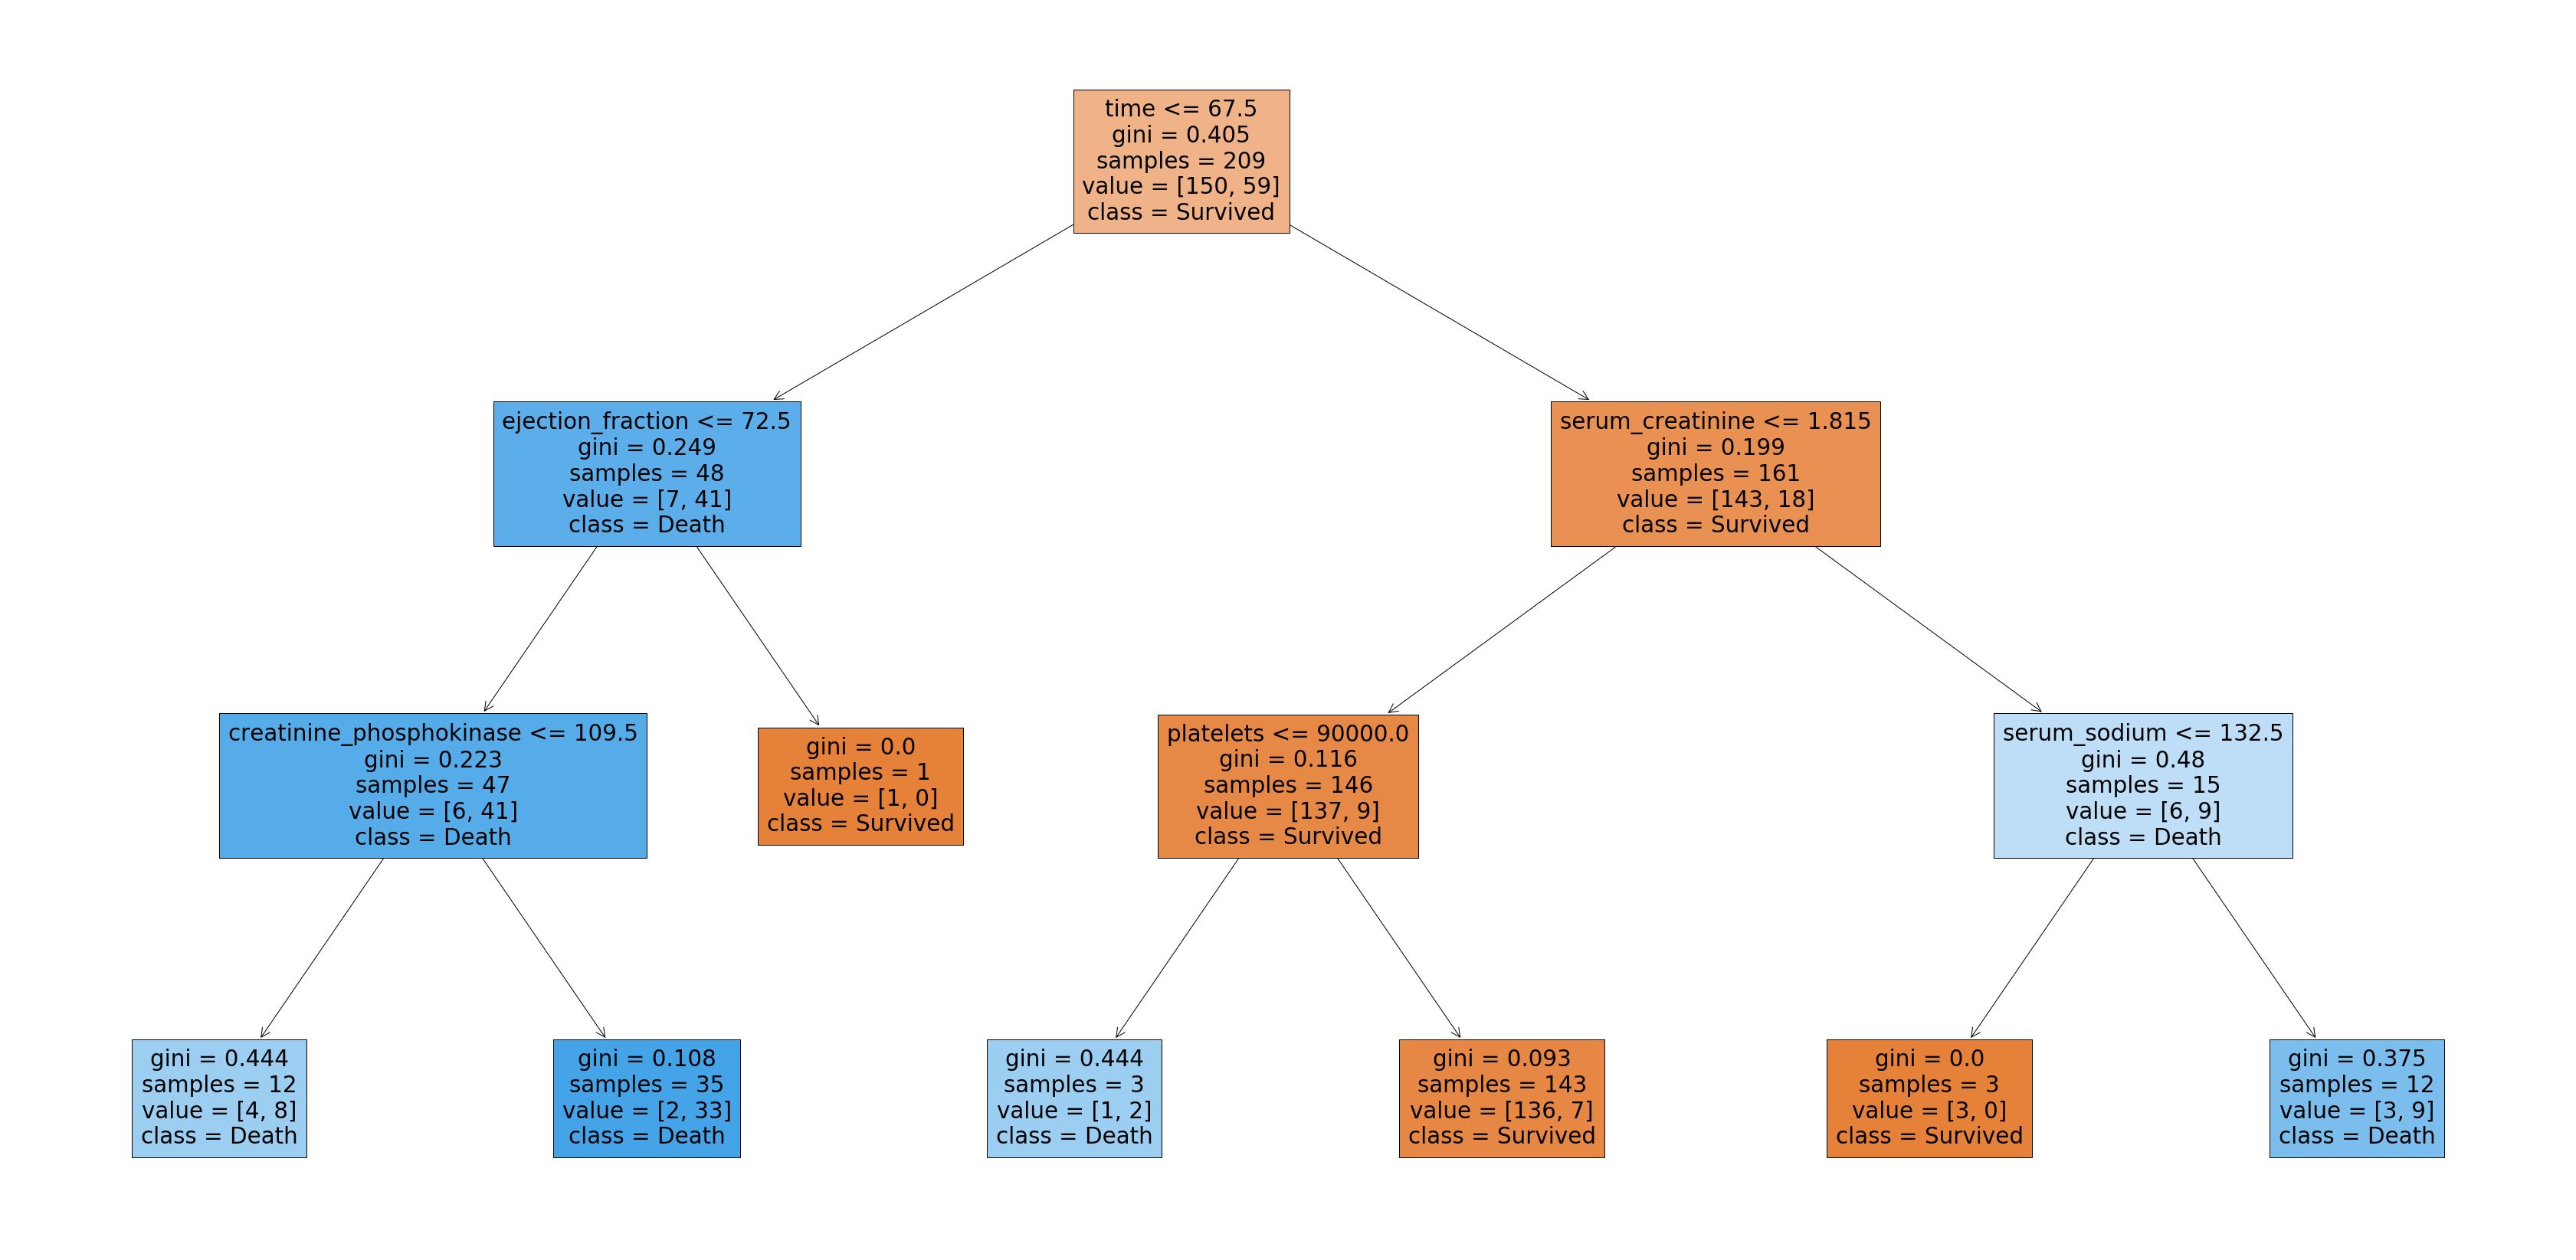

In [34]:
get_dt_graph(dt_depth) 


In [35]:
evaluate_model(dt_depth)

Train Accuracy : 0.9186602870813397
Train ROC_AUC Score : 0.9073446327683615
Train Confusion Matrix:
[[140  10]
 [  7  52]]
--------------------------------------------------
Test Accuracy : 0.7222222222222222
Train ROC_AUC Score : 0.6947985721570628
Test Confusion Matrix:
[[45  8]
 [17 20]]


### Specifying minimum samples before split

In [36]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20)

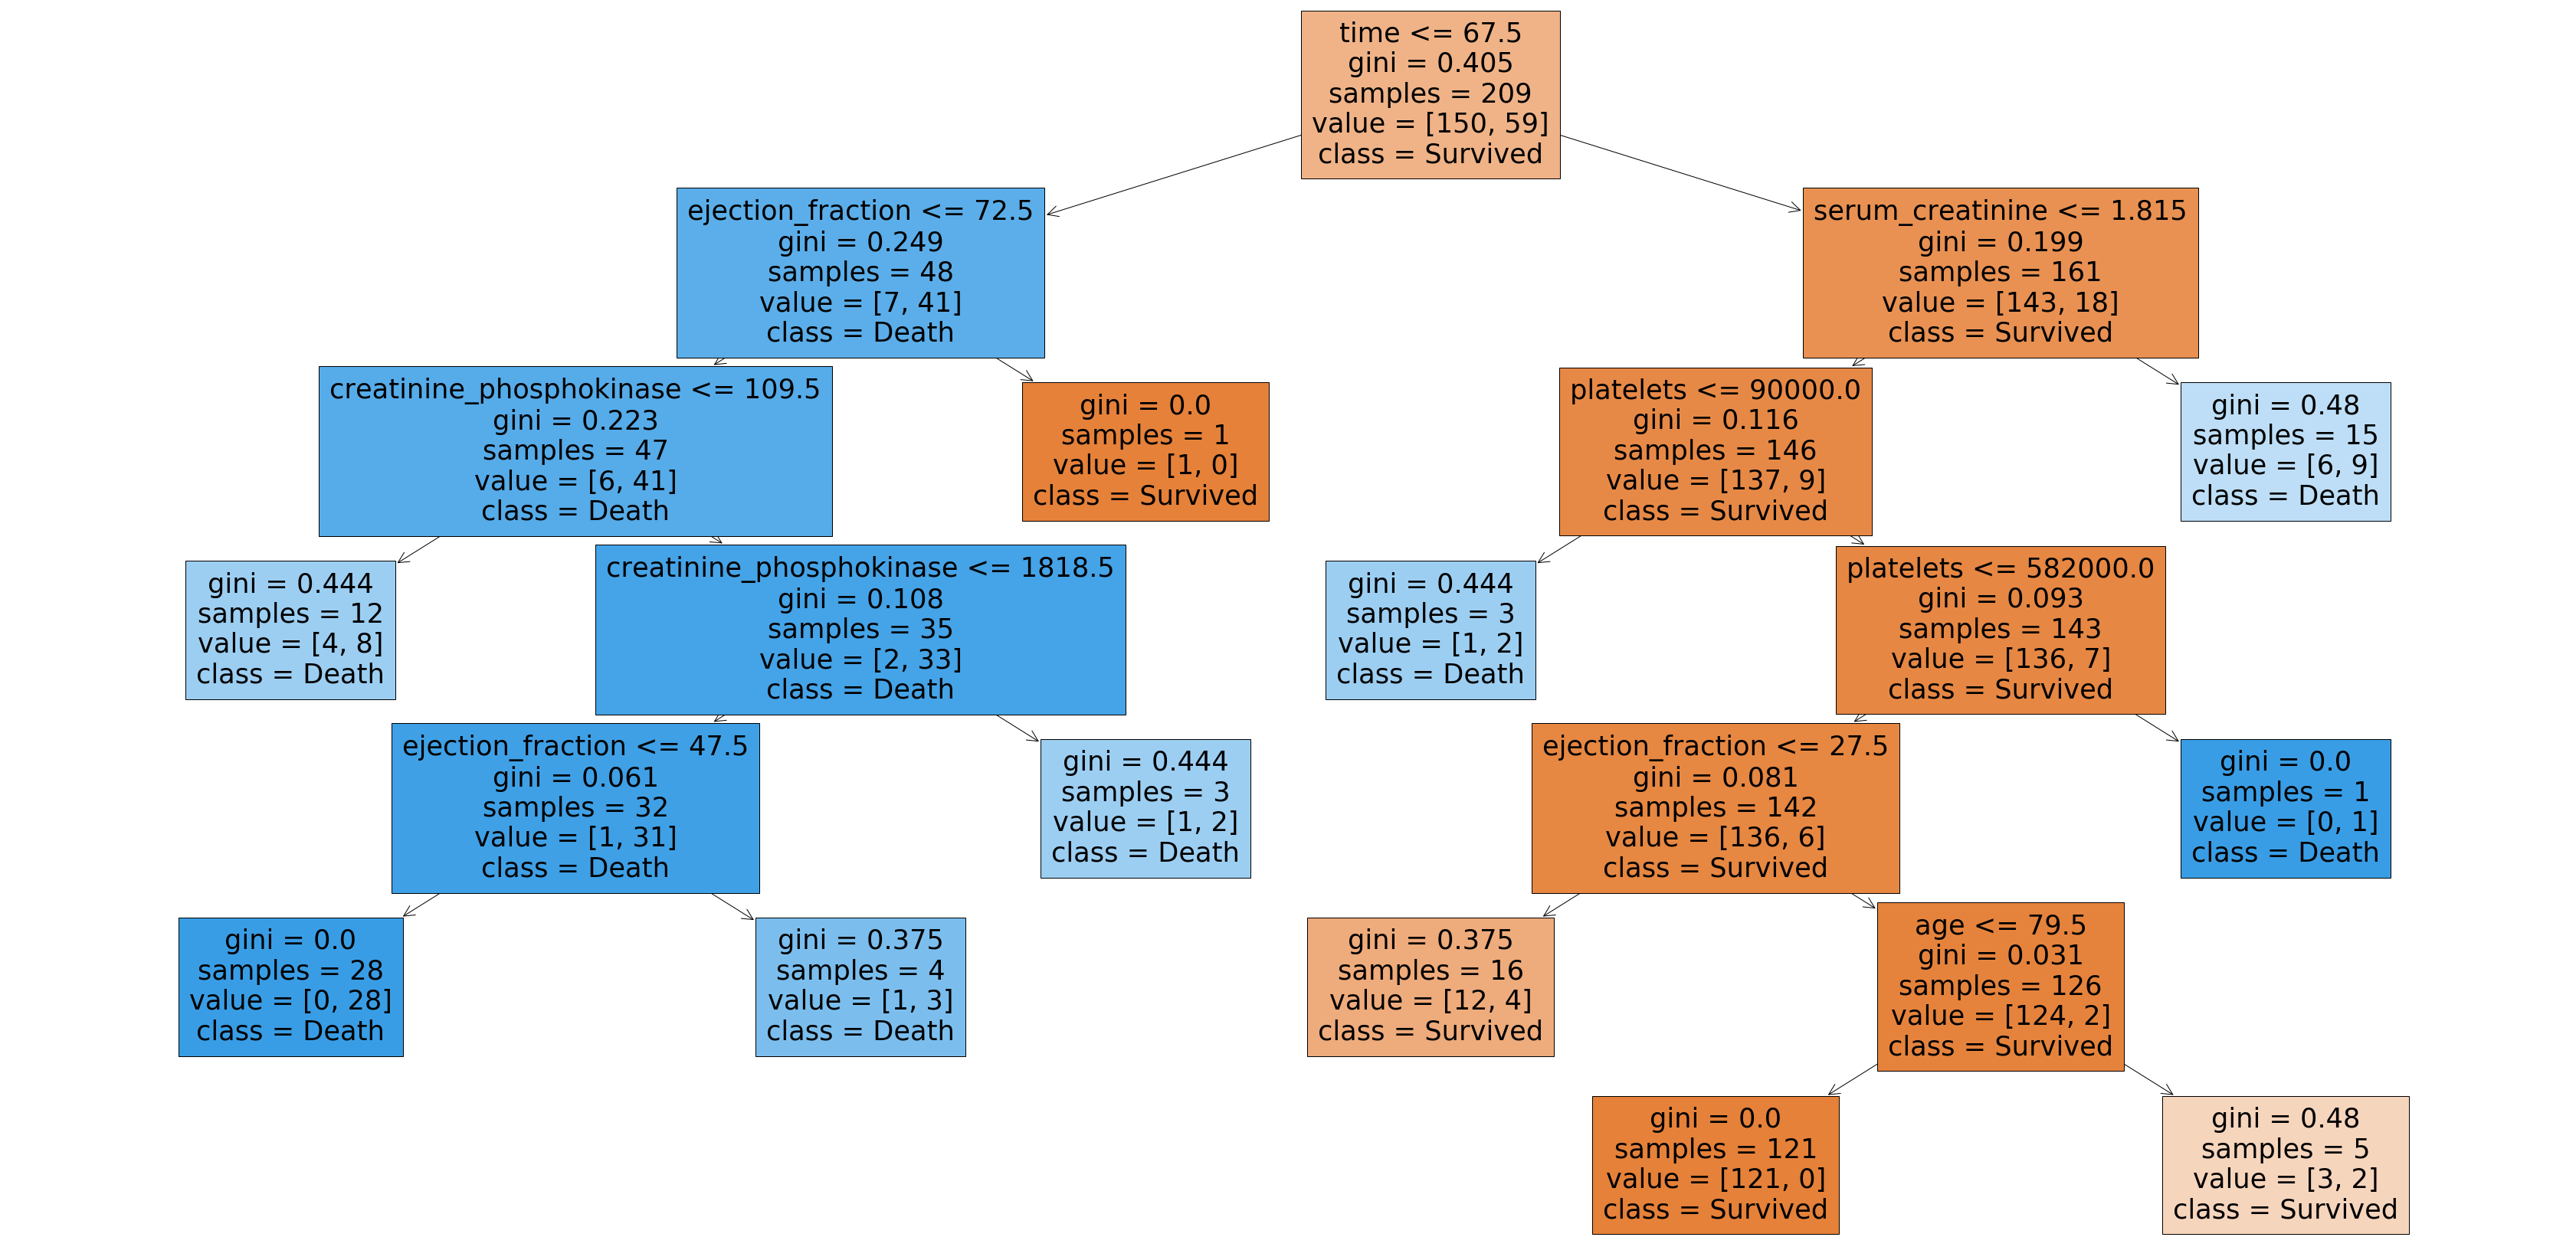

In [37]:
get_dt_graph(dt_min_split) 


In [38]:
evaluate_model(dt_min_split)

Train Accuracy : 0.9090909090909091
Train ROC_AUC Score : 0.905819209039548
Train Confusion Matrix:
[[137  13]
 [  6  53]]
--------------------------------------------------
Test Accuracy : 0.7111111111111111
Train ROC_AUC Score : 0.693523712391637
Test Confusion Matrix:
[[42 11]
 [15 22]]


### Specifying minimum samples in leaf node

In [39]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

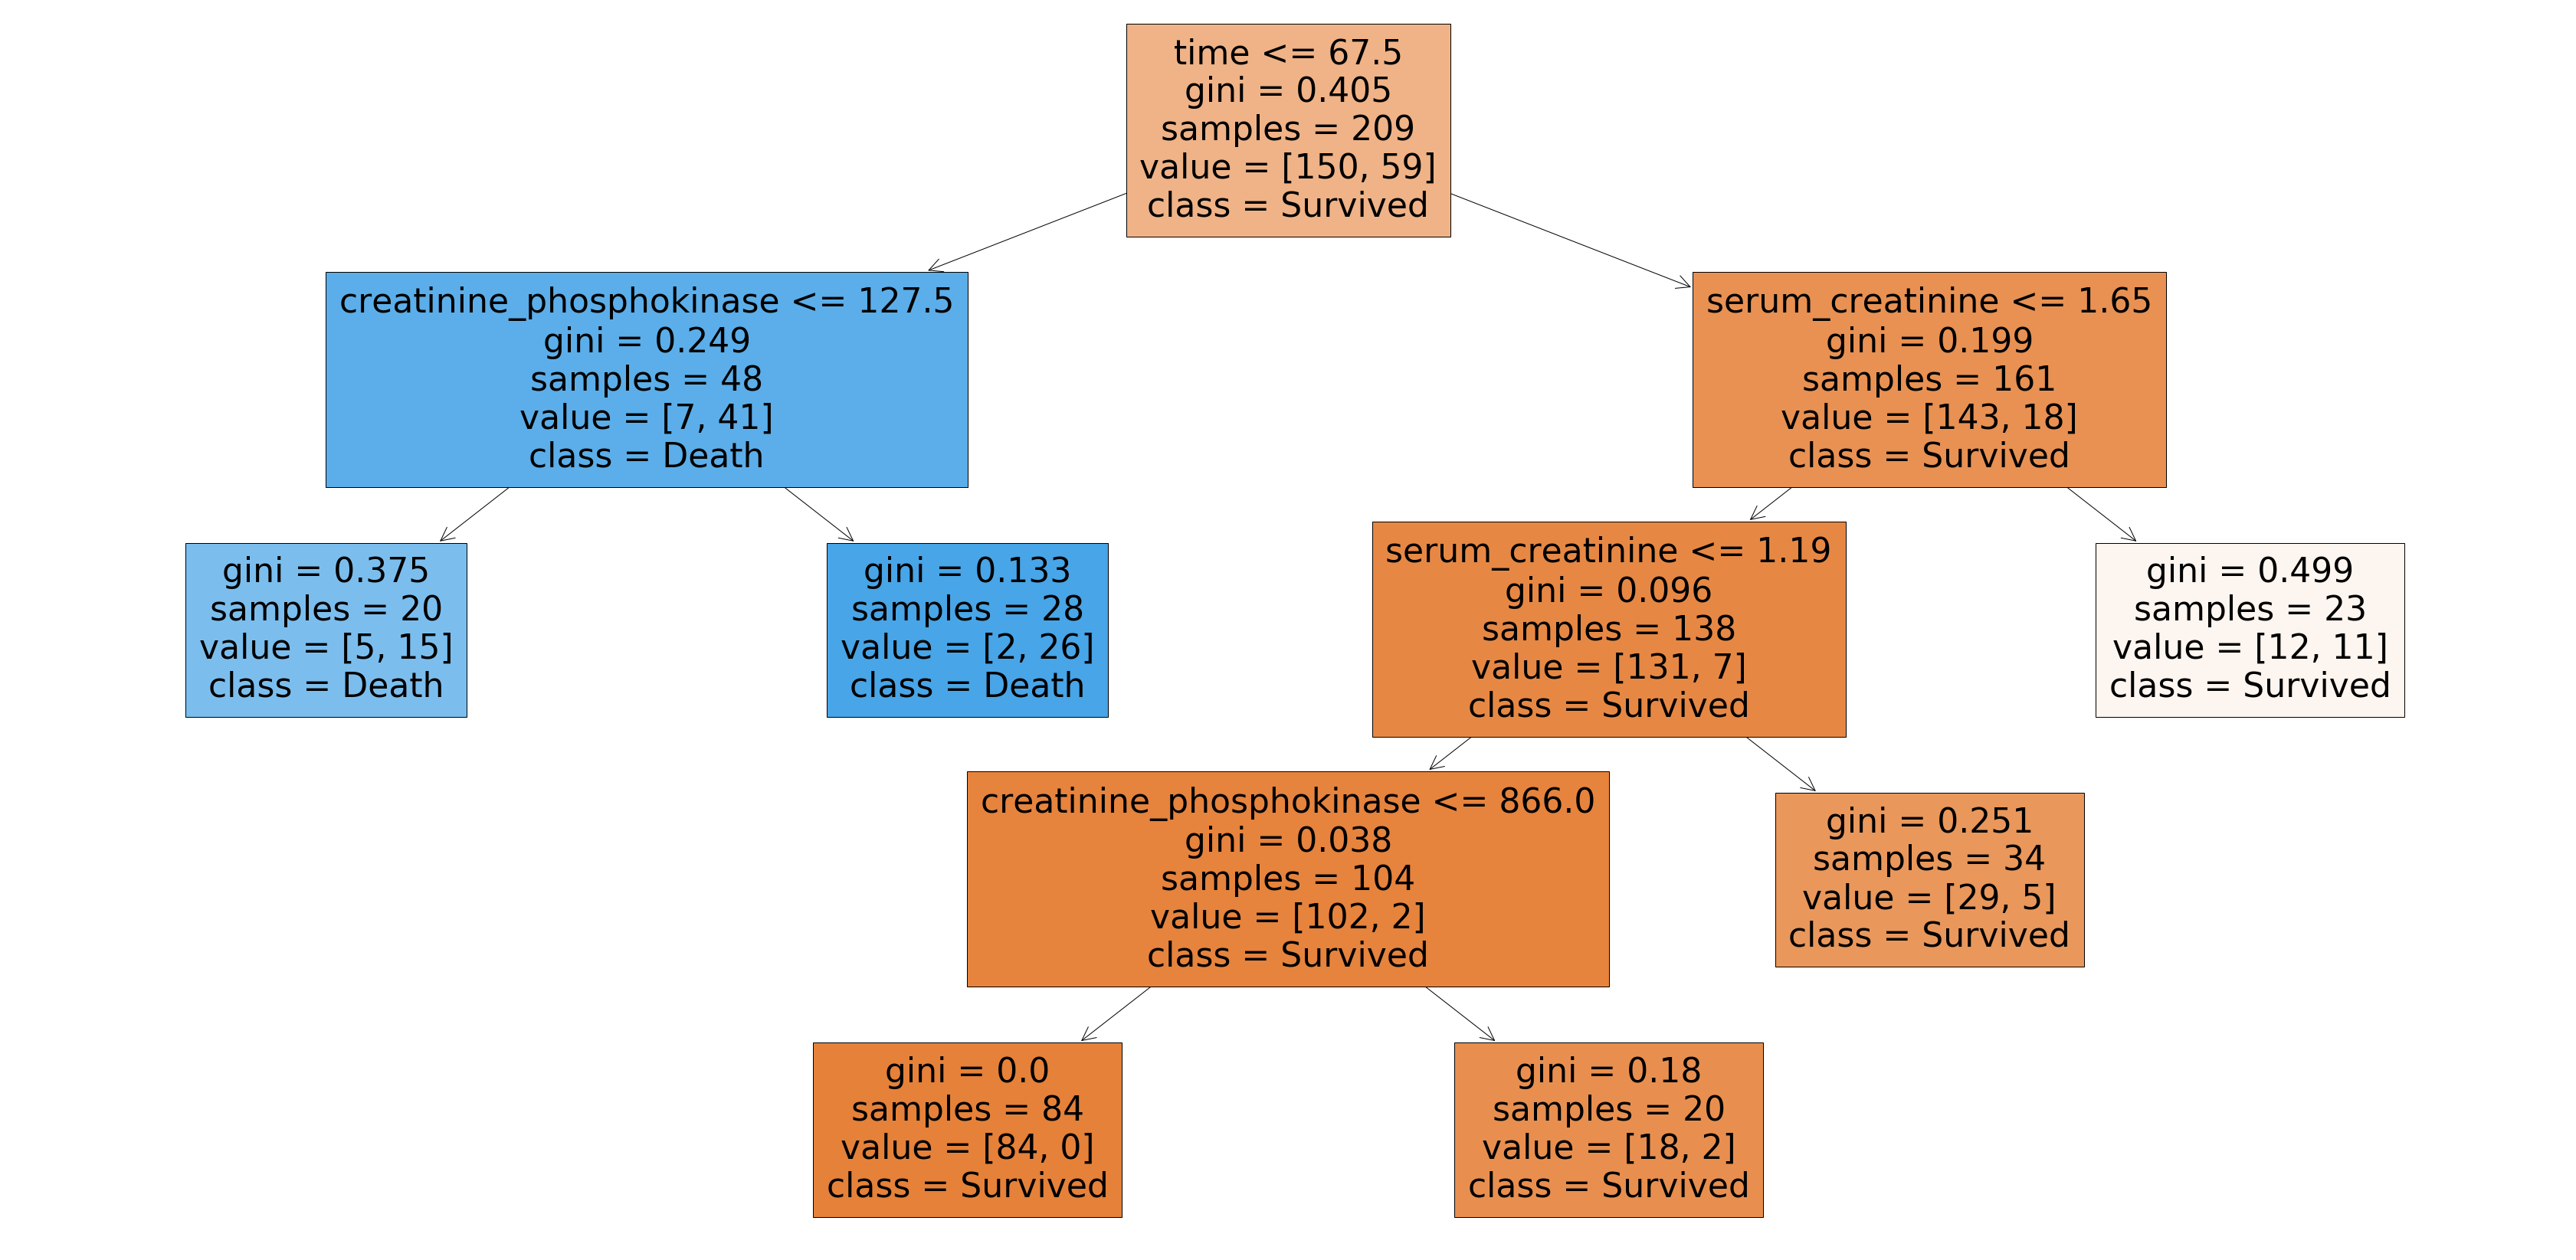

In [40]:
get_dt_graph(dt_min_leaf)


In [41]:
evaluate_model(dt_min_leaf)

Train Accuracy : 0.8803827751196173
Train ROC_AUC Score : 0.8241242937853107
Train Confusion Matrix:
[[143   7]
 [ 18  41]]
--------------------------------------------------
Test Accuracy : 0.7666666666666667
Train ROC_AUC Score : 0.728454869964304
Test Confusion Matrix:
[[50  3]
 [18 19]]


### Using Entropy instead of Gini

In [42]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

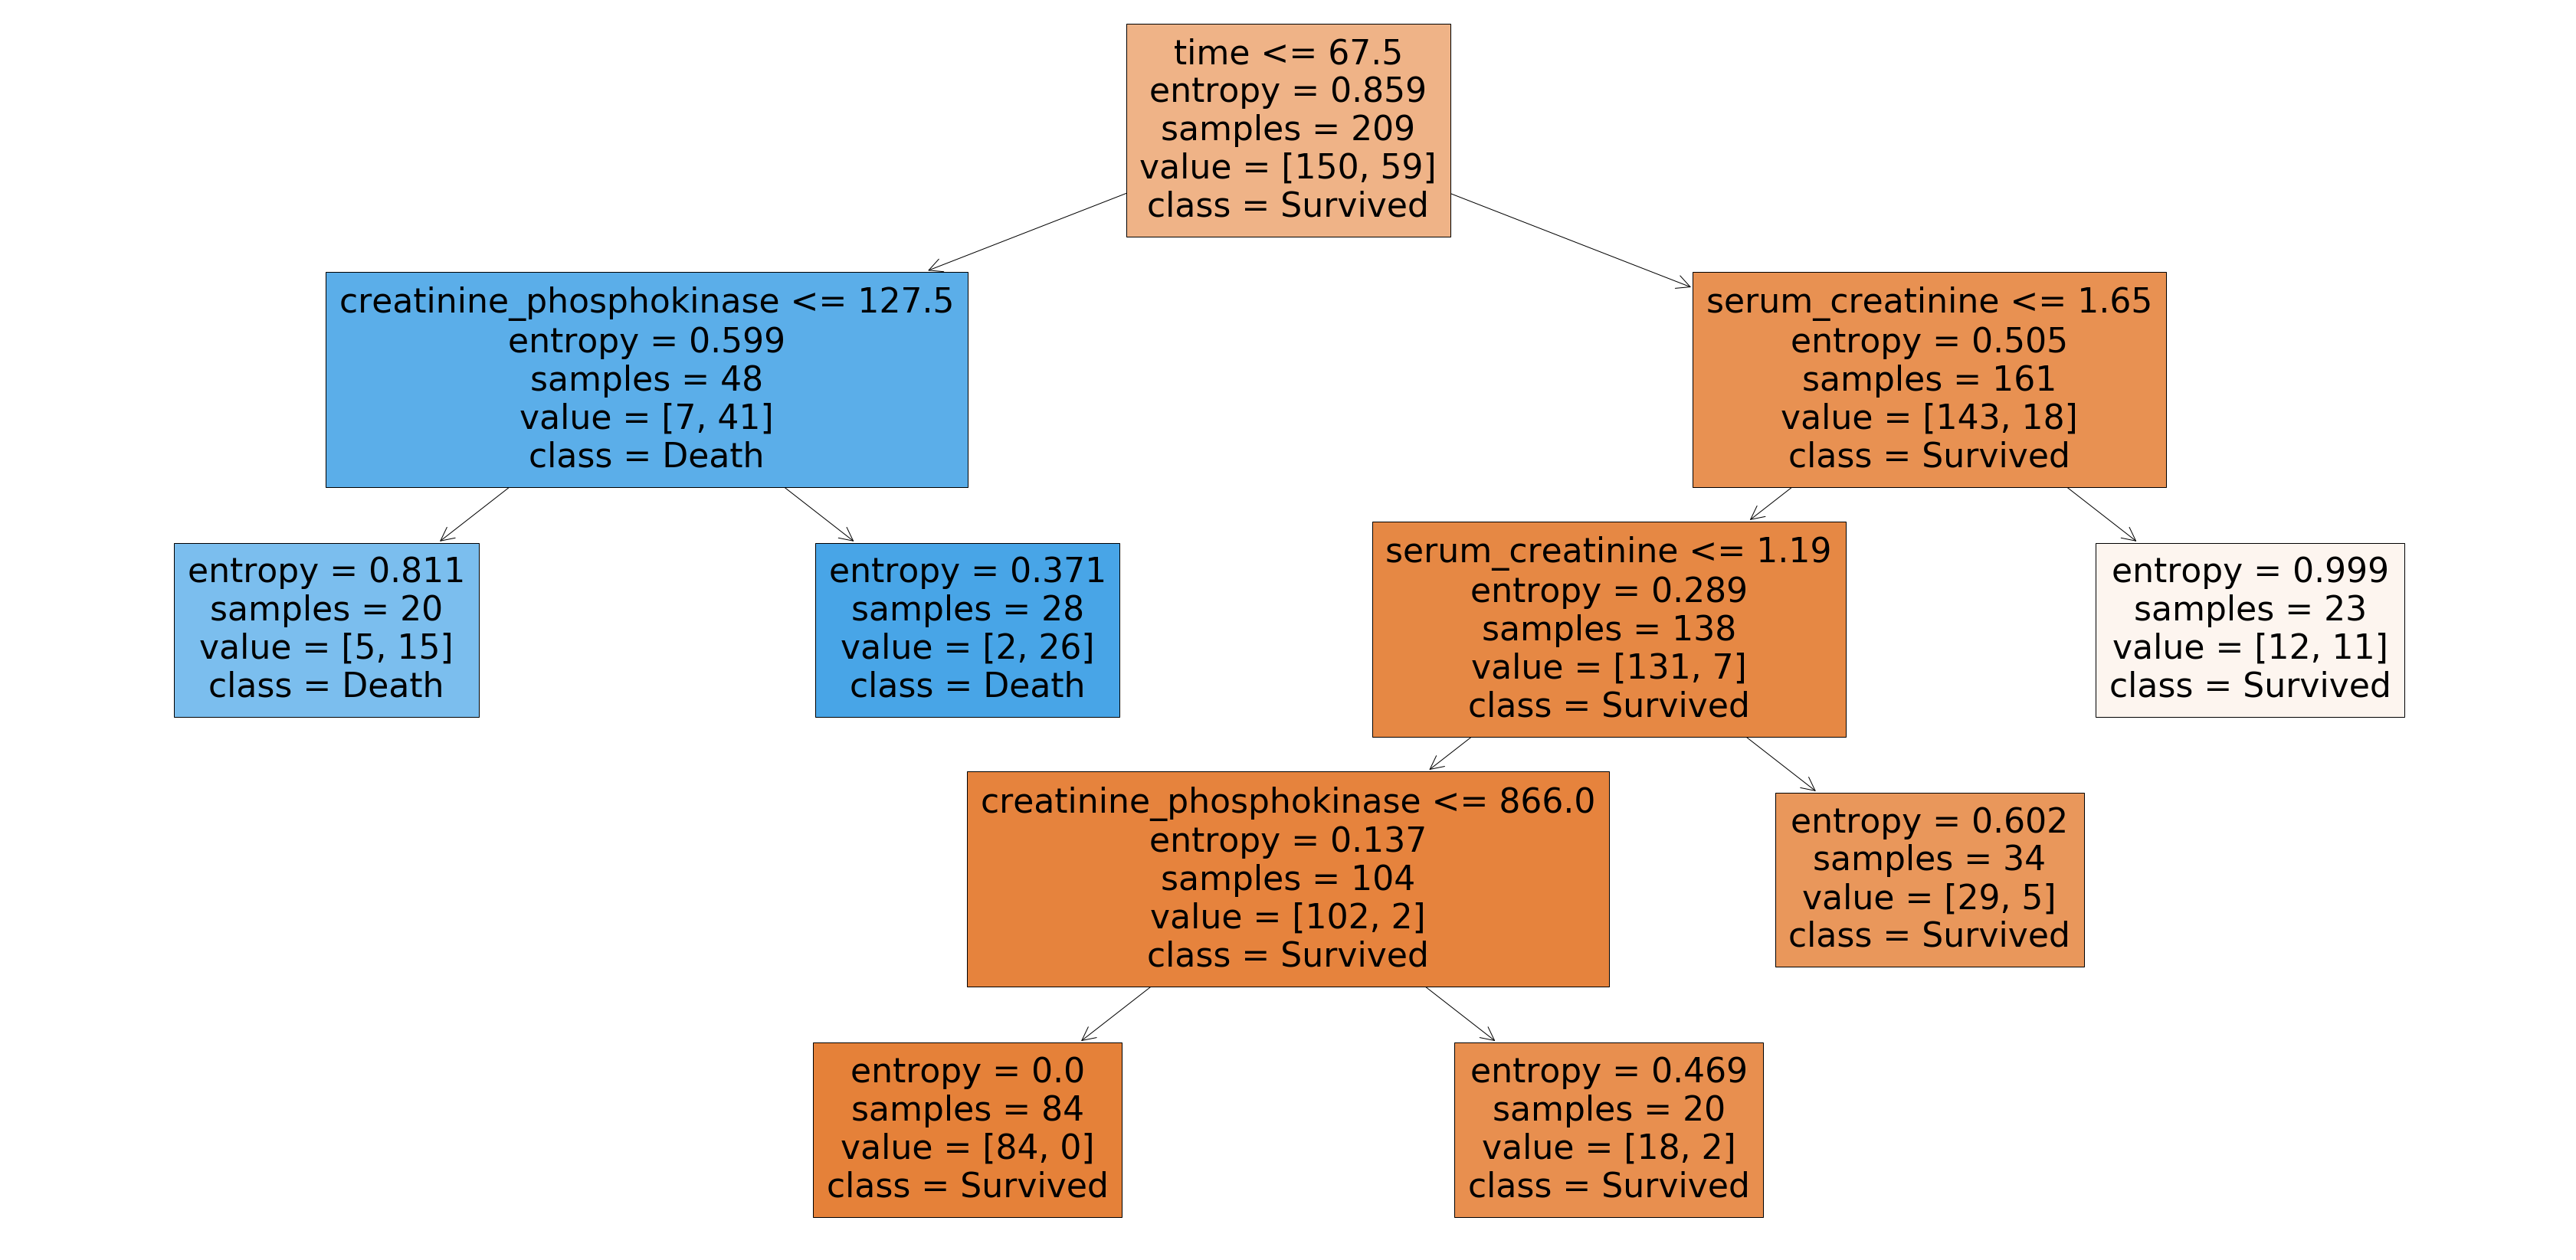

In [43]:
get_dt_graph(dt_min_leaf_entropy)


In [44]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy : 0.8803827751196173
Train ROC_AUC Score : 0.8241242937853107
Train Confusion Matrix:
[[143   7]
 [ 18  41]]
--------------------------------------------------
Test Accuracy : 0.7666666666666667
Train ROC_AUC Score : 0.728454869964304
Test Confusion Matrix:
[[50  3]
 [18 19]]


### Hyper-parameter tuning

In [45]:
dt = DecisionTreeClassifier(random_state=42)

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [48]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [49]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.9s


Wall time: 7.64 s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.5s finished


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [50]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.007999      0.000708         0.004494        0.000497   
1       0.008995      0.003673         0.003998        0.000003   
2       0.010493      0.007822         0.006247        0.004492   
3       0.006746      0.000432         0.002999        0.000002   
4       0.007497      0.001497         0.006246        0.002859   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               2                      5   
1            gini               2                     10   
2            gini               2                     20   
3            gini               2                     50   
4            gini               2                    100   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.849057   
1  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.830189   
2  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.830189   
3  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.830189   
4  {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.716981   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.865385           0.769231           0.826923         0.827649   
1           0.961538           0.769231           0.826923         0.846970   
2           0.961538           0.769231           0.903846         0.866201   
3           0.846154           0.730769           0.769231         0.794086   
4           0.730769           0.711538           0.711538         0.717707   

   std_test_score  rank_test_score  
0        0.036385               21  
1        0.070450               11  
2        0.072812                1  
3        0.046479               31  
4        0.007862               41

In [51]:
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
2        0.010493      0.007822         0.006247        0.004492   
7        0.006745      0.000829         0.003498        0.000500   
12       0.007995      0.001224         0.003749        0.000433   
17       0.005997      0.000002         0.003747        0.000432   
22       0.007995      0.001999         0.005747        0.004203   

   param_criterion param_max_depth param_min_samples_leaf  \
2             gini               2                     20   
7             gini               3                     20   
12            gini               5                     20   
17            gini              10                     20   
22            gini              20                     20   

                                               params  split0_test_score  \
2   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.830189   
7   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.830189   
12  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.830189   
17  {'criterion': 'gini', 'max_depth': 10, 'min_sa...           0.830189   
22  {'criterion': 'gini', 'max_depth': 20, 'min_sa...           0.830189   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
2            0.961538           0.769231           0.903846         0.866201   
7            0.961538           0.769231           0.903846         0.866201   
12           0.961538           0.769231           0.903846         0.866201   
17           0.961538           0.769231           0.903846         0.866201   
22           0.961538           0.769231           0.903846         0.866201   

    std_test_score  rank_test_score  
2         0.072812                1  
7         0.072812                1  
12        0.072812                1  
17        0.072812                1  
22        0.072812                1

In [52]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=20, random_state=42)

In [53]:
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Train Accuracy : 0.8803827751196173
Train ROC_AUC Score : 0.8241242937853107
Train Confusion Matrix:
[[143   7]
 [ 18  41]]
--------------------------------------------------
Test Accuracy : 0.7666666666666667
Train ROC_AUC Score : 0.728454869964304
Test Confusion Matrix:
[[50  3]
 [18 19]]


In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        53
           1       0.86      0.51      0.64        37

    accuracy                           0.77        90
   macro avg       0.80      0.73      0.74        90
weighted avg       0.79      0.77      0.75        90



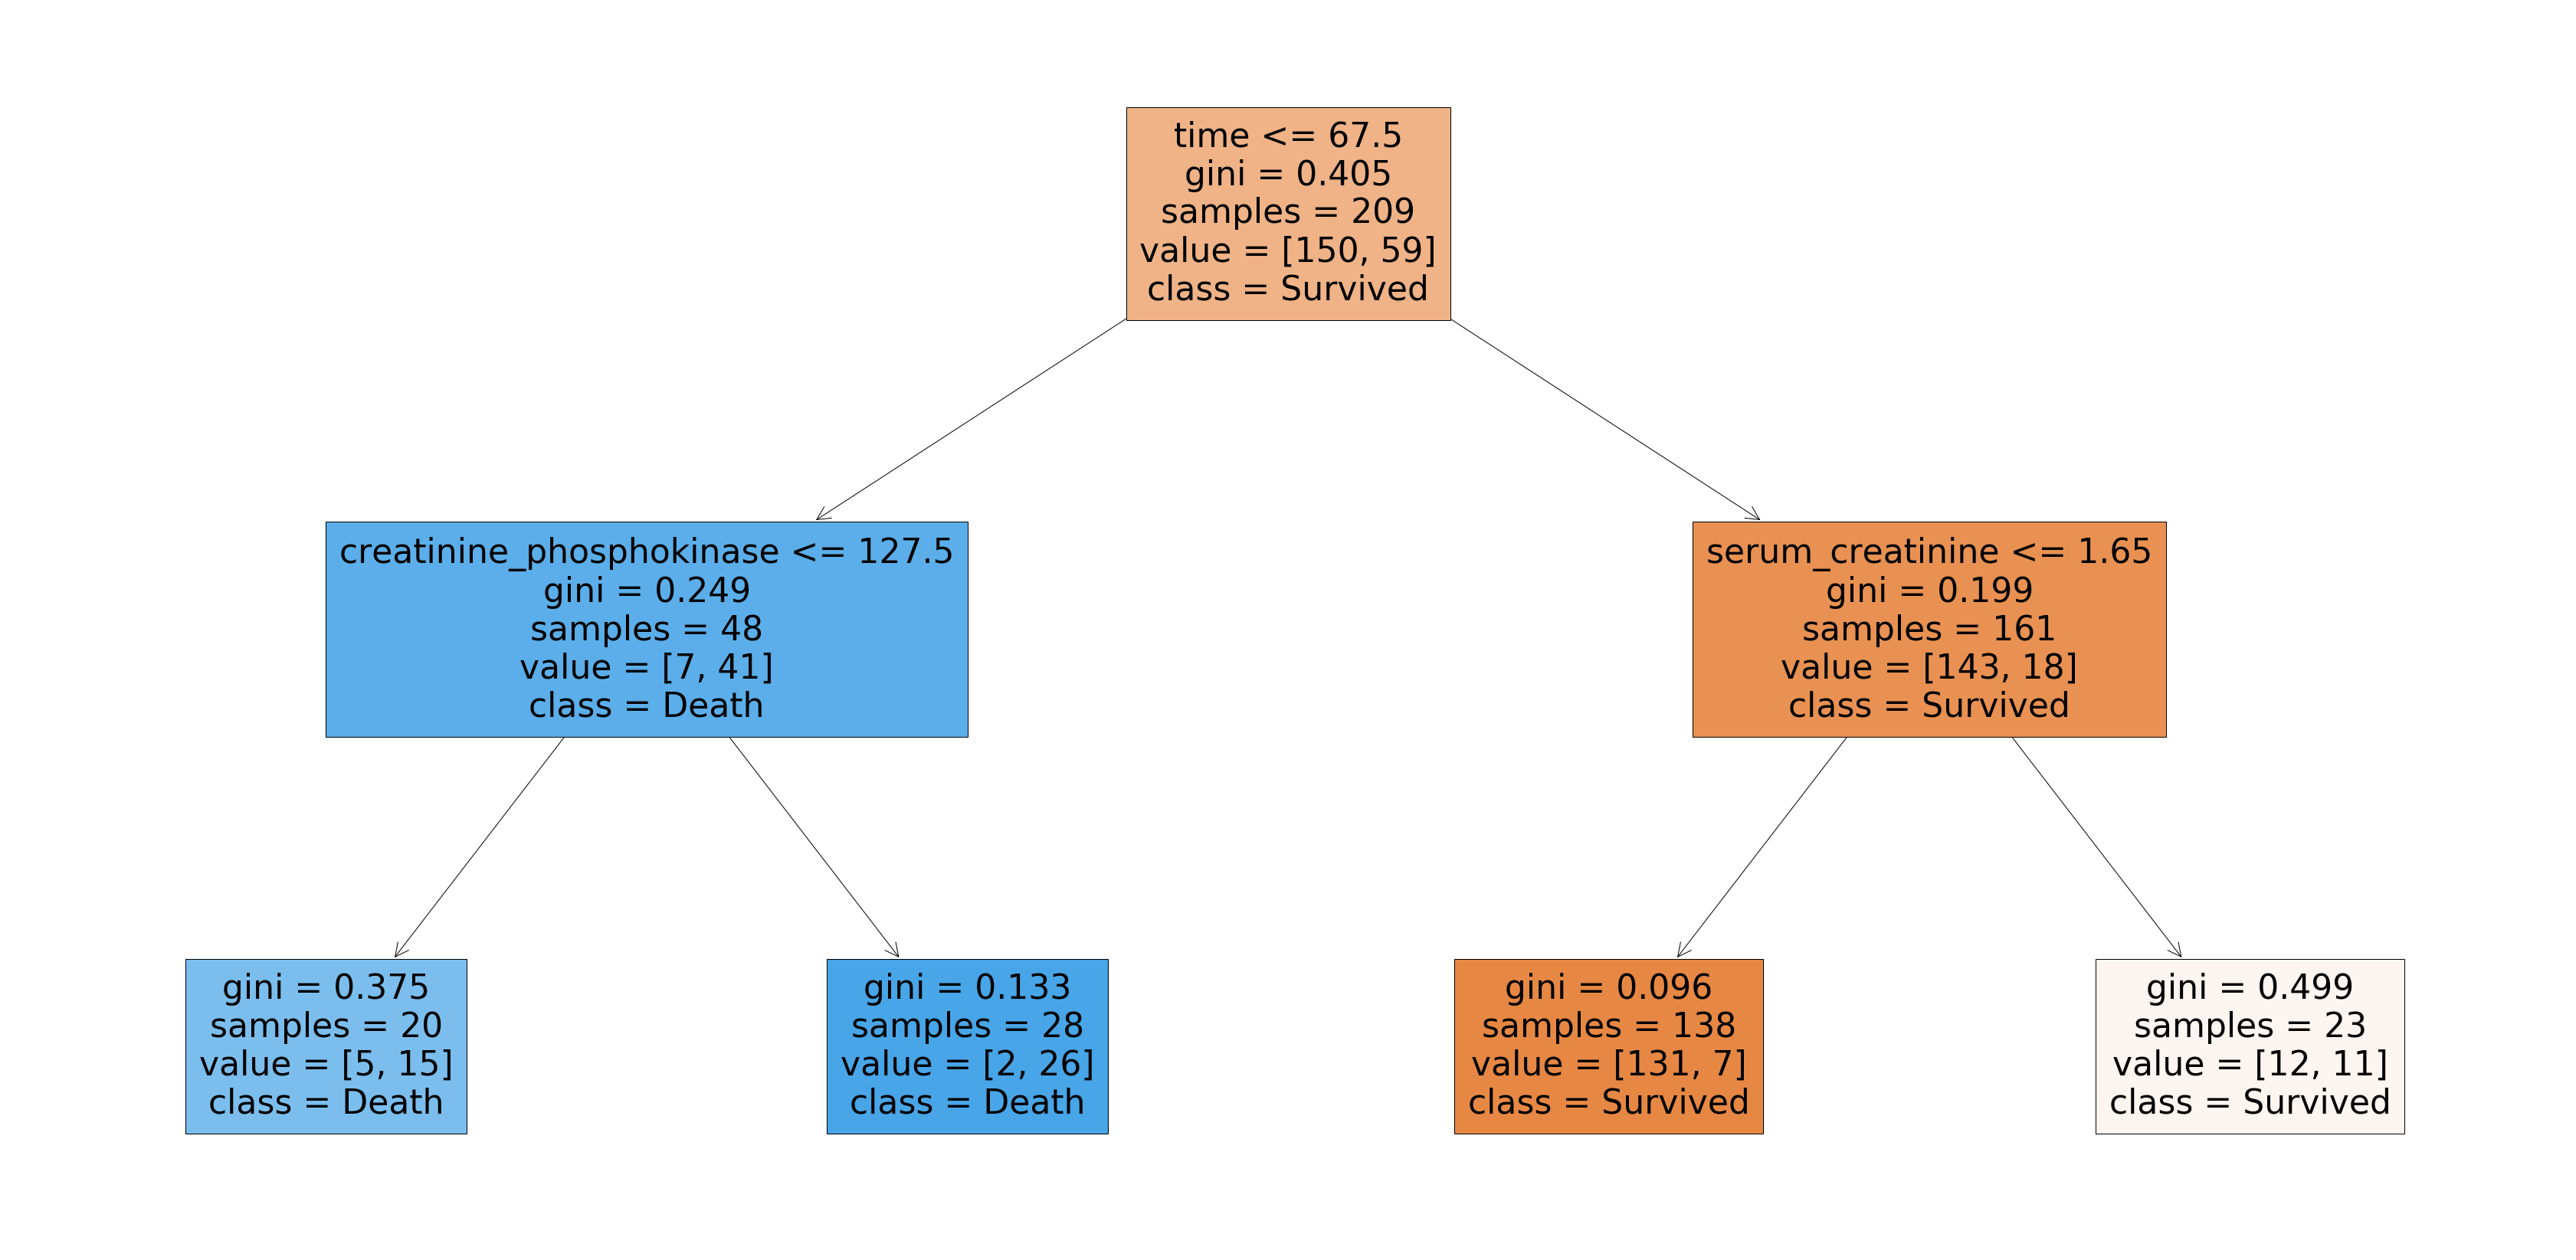

In [56]:
get_dt_graph(dt_best)


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=3)

In [59]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=42)

In [60]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='auto',
                       random_state=1608637542)

In [61]:
sample_tree = rf.estimators_[4]

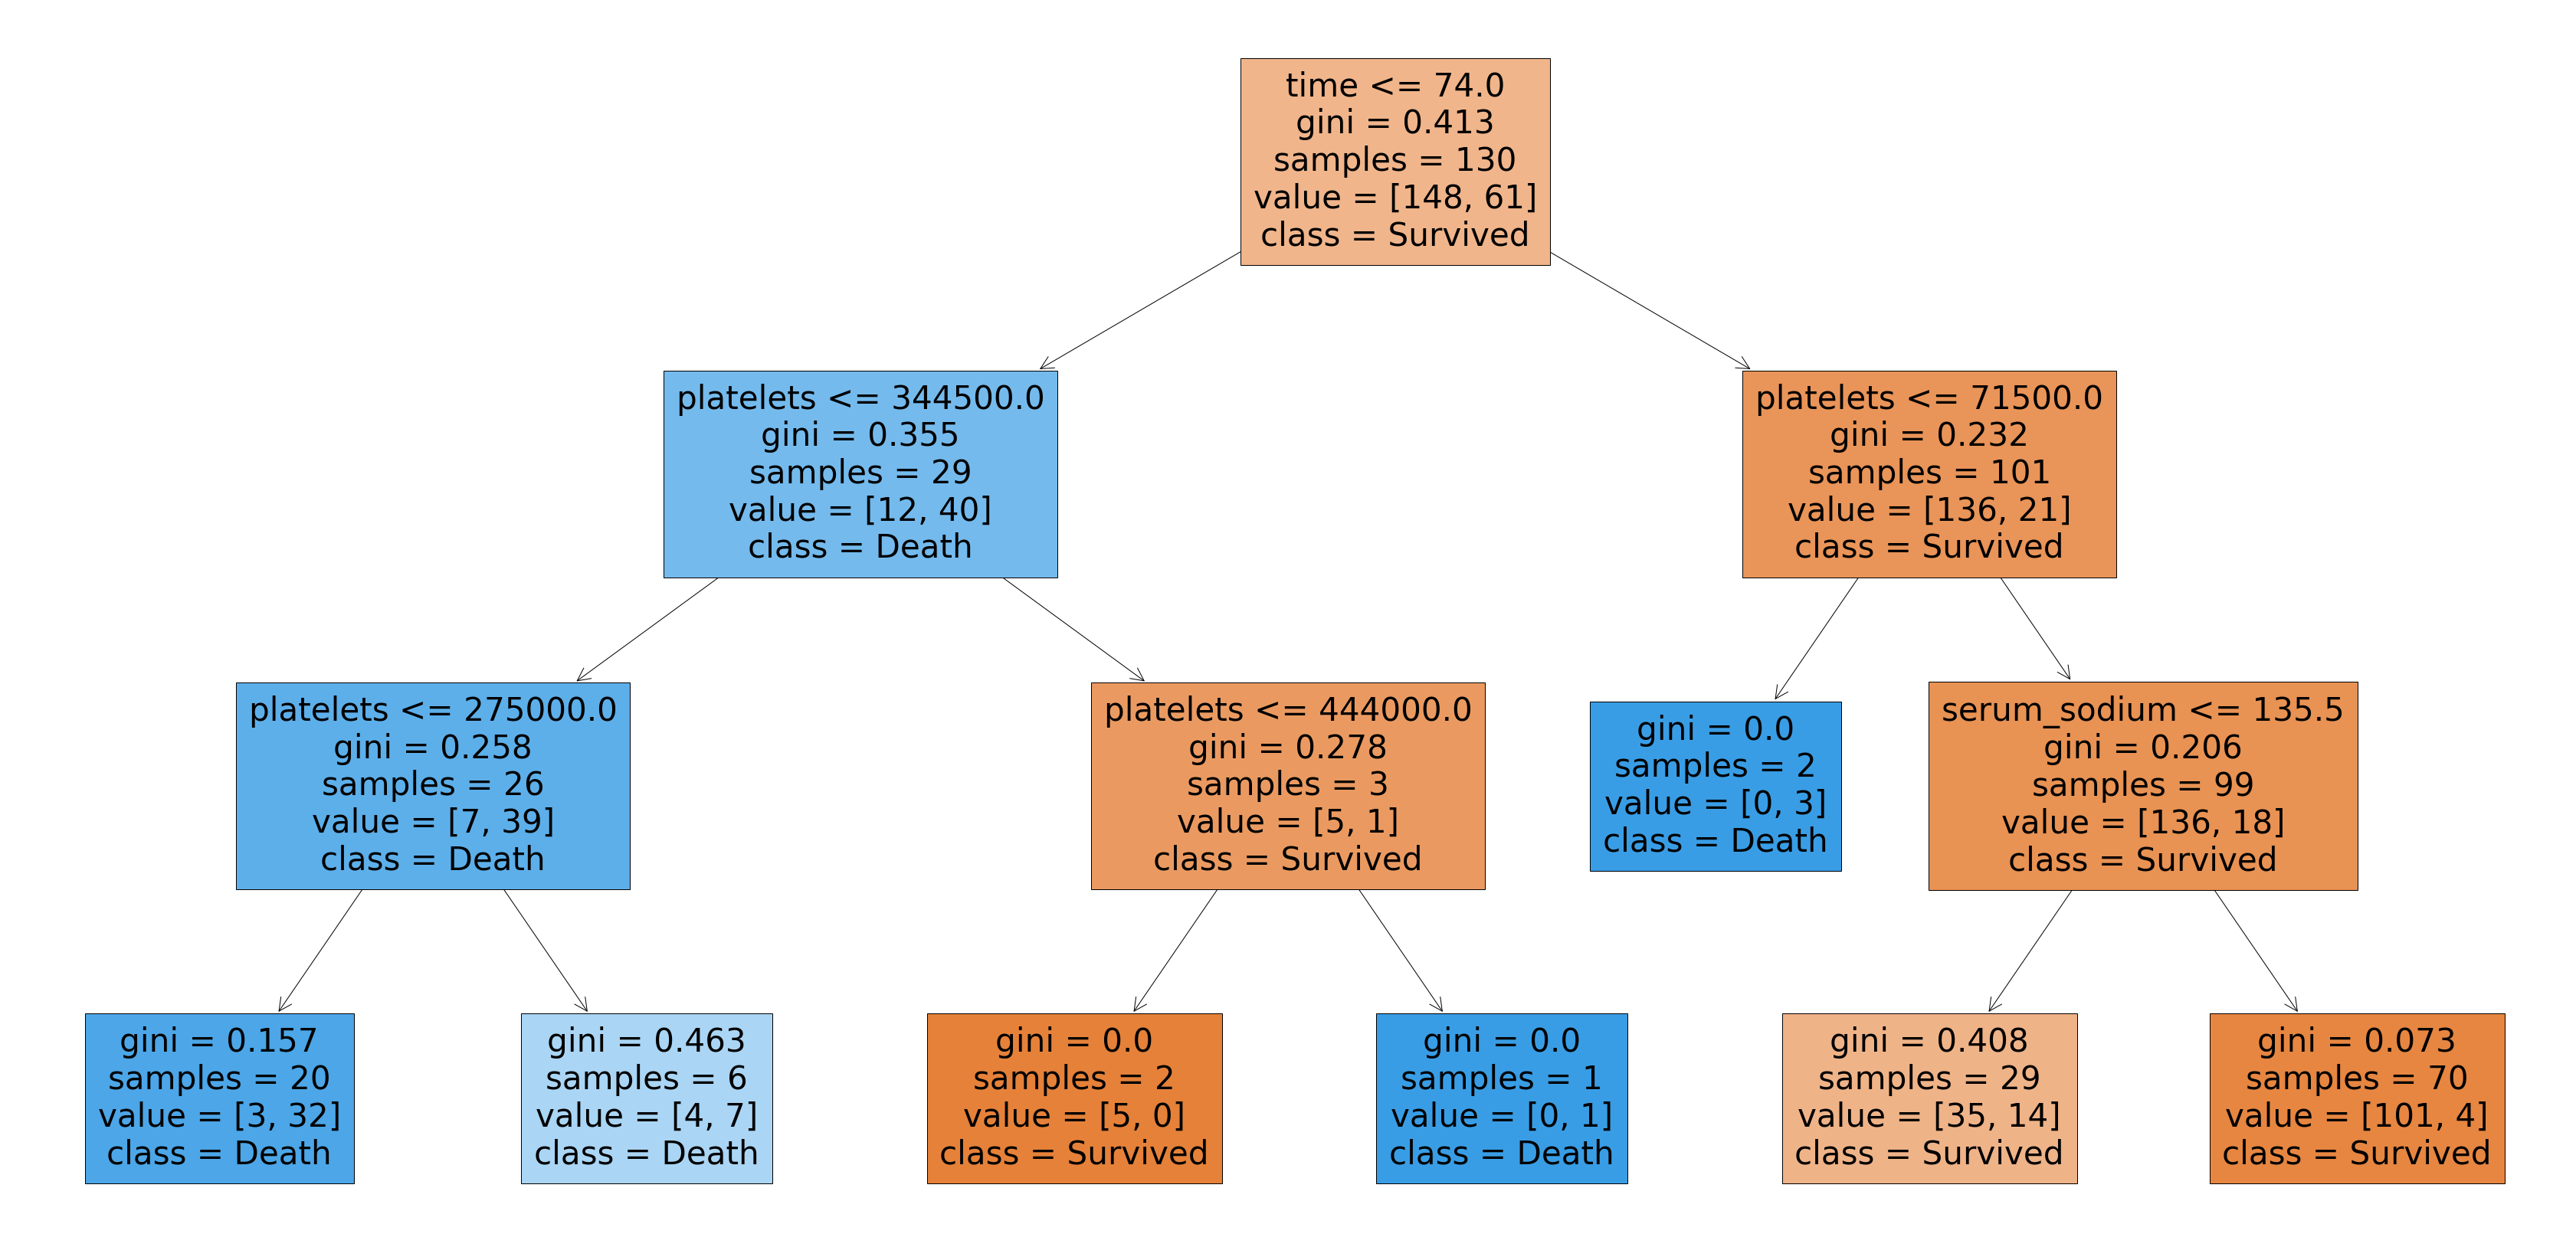

In [62]:
get_dt_graph(sample_tree)


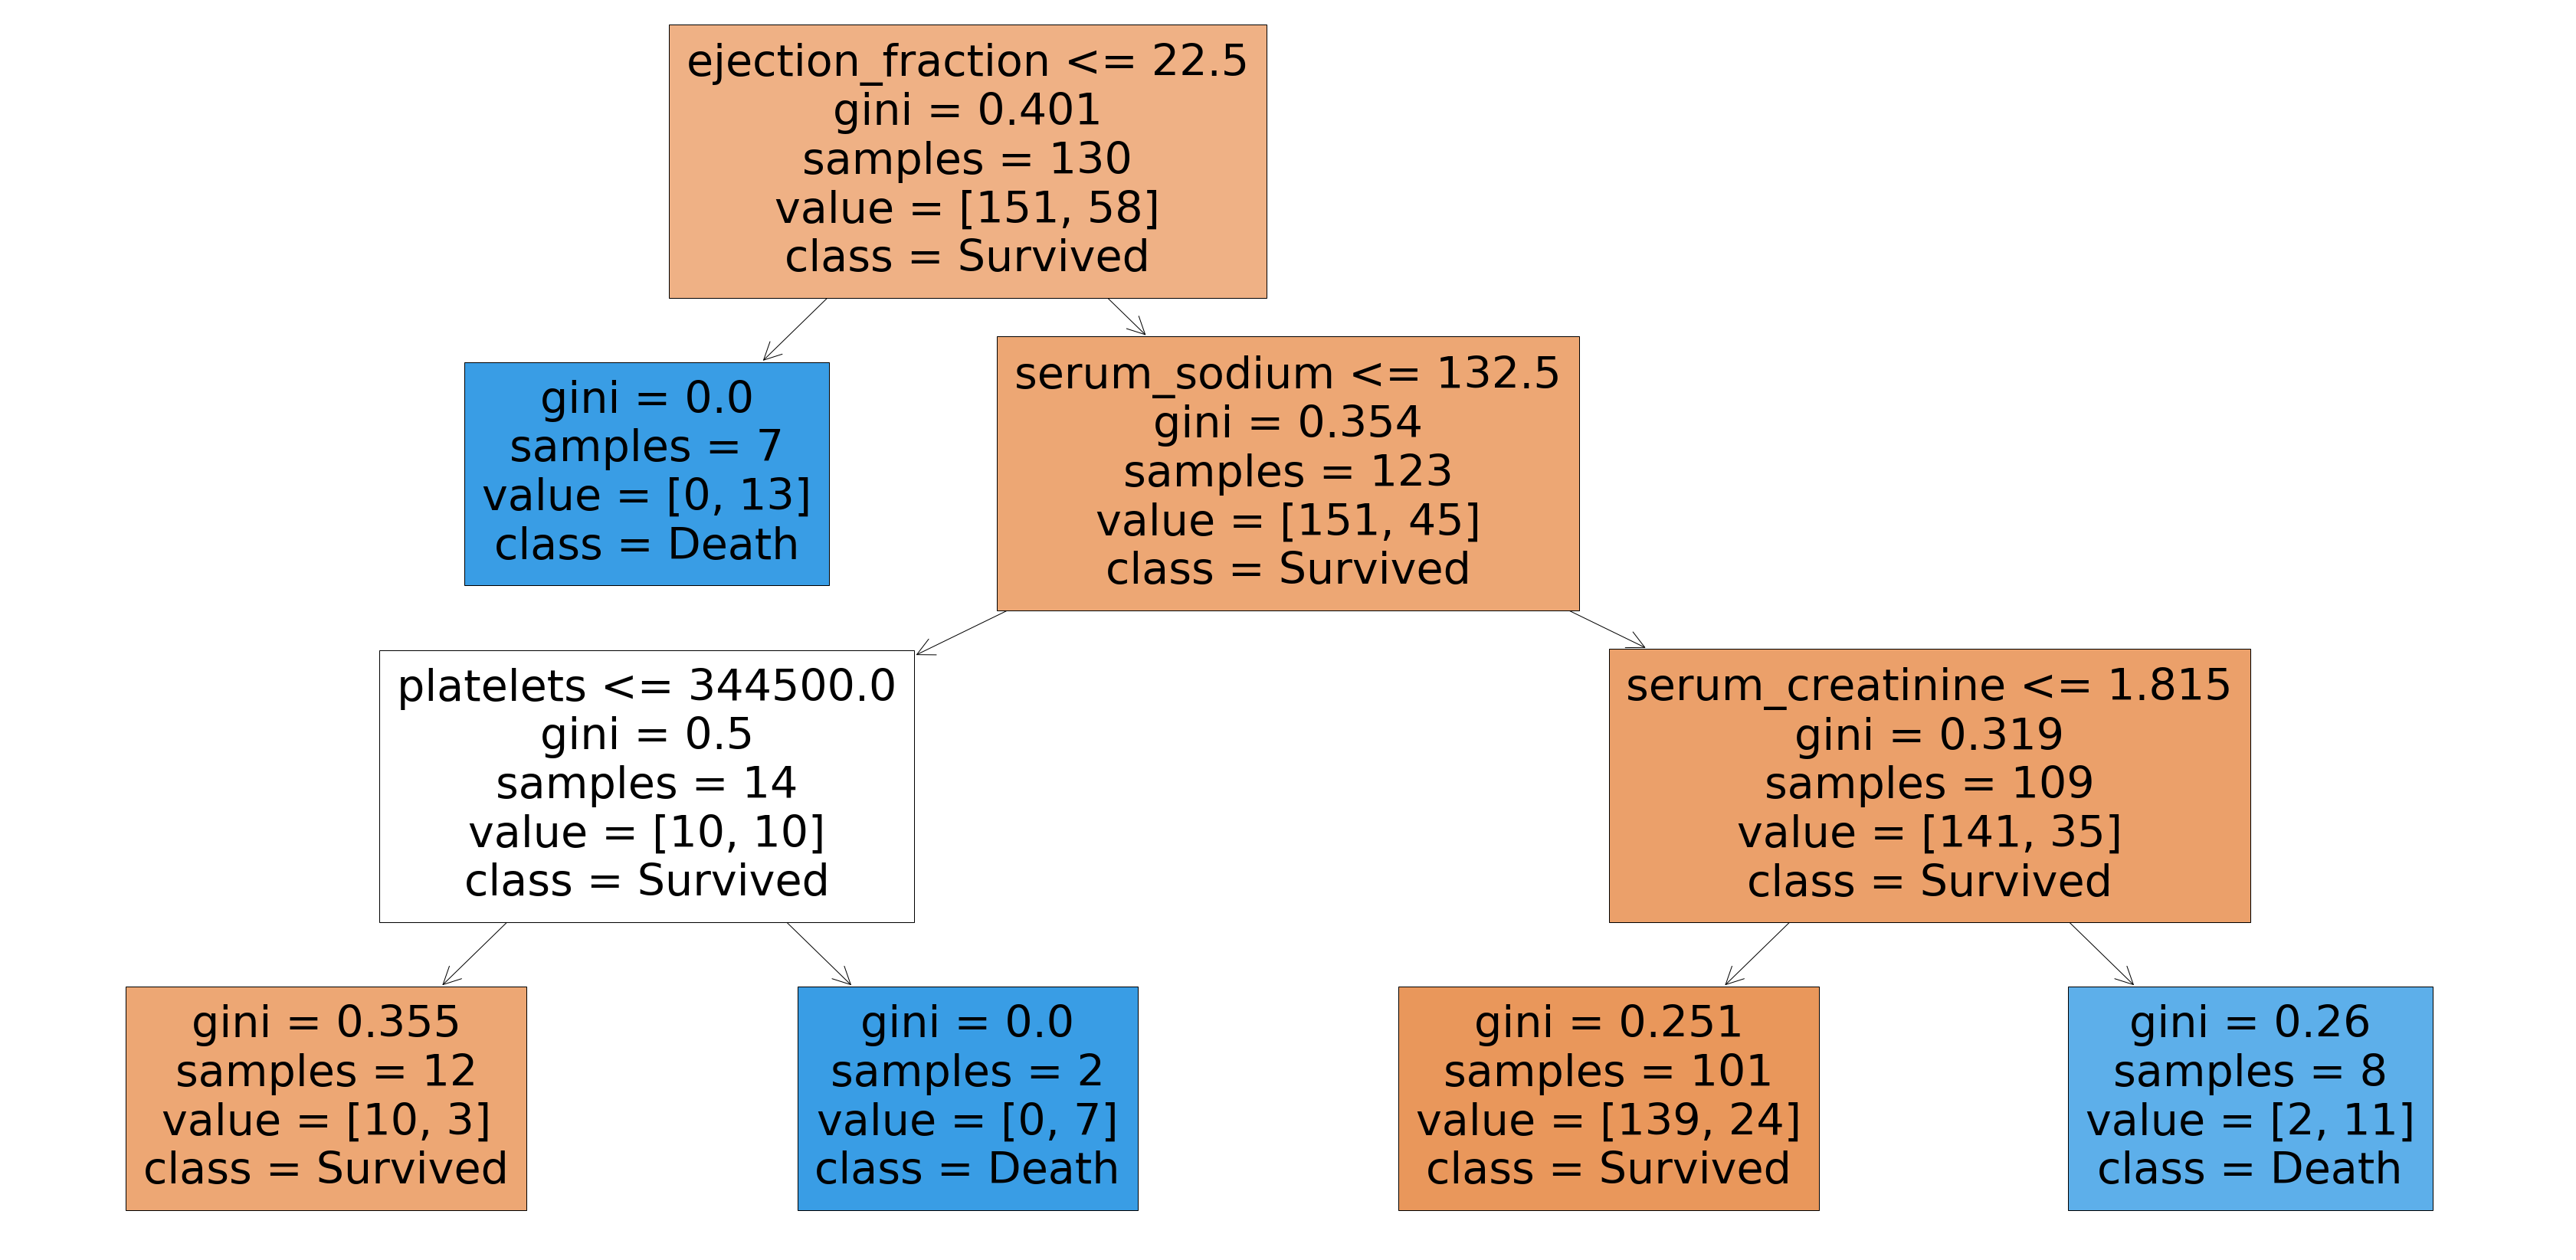

In [63]:
get_dt_graph(rf.estimators_[2])


In [64]:
evaluate_model(rf)

Train Accuracy : 0.9234449760765551
Train ROC_AUC Score : 0.8798305084745763
Train Confusion Matrix:
[[147   3]
 [ 13  46]]
--------------------------------------------------
Test Accuracy : 0.7666666666666667
Train ROC_AUC Score : 0.7325344212136665
Test Confusion Matrix:
[[49  4]
 [17 20]]


### Grid search for hyper-parameter tuning

In [65]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [66]:
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    'n_estimators': [10, 30, 50, 100, 200]
}

In [67]:
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "roc_auc")

In [68]:
%%time
grid_search.fit(X,y)

Fitting 4 folds for each of 375 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   36.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.7min


Wall time: 4min 21s


[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.4min finished


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [69]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=2, max_features=4, min_samples_leaf=5,
                       n_estimators=30, n_jobs=-1, random_state=42)

In [70]:
evaluate_model(rf_best)

Train Accuracy : 0.9090909090909091
Train ROC_AUC Score : 0.8698305084745763
Train Confusion Matrix:
[[144   6]
 [ 13  46]]
--------------------------------------------------
Test Accuracy : 0.8111111111111111
Train ROC_AUC Score : 0.7784293727689955
Test Confusion Matrix:
[[51  2]
 [15 22]]


### Variable importance in RandomForest and Decision trees

In [71]:
rf_best.feature_importances_

array([0.1408779 , 0.        , 0.0309851 , 0.00302022, 0.14829427,
       0.00840897, 0.00389809, 0.19245995, 0.02169721, 0.        ,
       0.        , 0.45035829])

In [72]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [73]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
11                      time  0.450358
7           serum_creatinine  0.192460
4          ejection_fraction  0.148294
0                        age  0.140878
2   creatinine_phosphokinase  0.030985
8               serum_sodium  0.021697
5        high_blood_pressure  0.008409
6                  platelets  0.003898
3                   diabetes  0.003020
1                    anaemia  0.000000
9                        sex  0.000000
10                   smoking  0.000000

In [76]:
with open('HDClassifierRF.pkl','wb')as pickle_file:
    pickle.dump(rf_best,pickle_file)